## データのダウンロード&解凍

In [1]:
%%bash
mkdir zips
cd ./zips

for i in {01..10}; do
    wget http://mathieu.delalandre.free.fr/projects/sesyd/symbols/floorplans/floorplans16-$i.zip
    unzip floorplans16-$i.zip -d ../data/FloorPlansGraph5_iter
done

cd ./..

Archive:  floorplans16-01.zip
   creating: ../data/FloorPlansGraph5_iter/floorplans16-01/
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_0.gom  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_0.svg  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_0.tiff  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_0.xml  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_1.gom  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_1.svg  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_1.tiff  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_1.xml  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_10.gom  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_10.svg  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_10.tiff  
  inflating: ../data/FloorPlansGraph5_iter/floorplans16-01/file_10.xml  
  inflating: ../data/FloorPlansGraph5_i

mkdir: cannot create directory ‘zips’: File exists
--2022-08-02 10:03:21--  http://mathieu.delalandre.free.fr/projects/sesyd/symbols/floorplans/floorplans16-01.zip
Resolving mathieu.delalandre.free.fr (mathieu.delalandre.free.fr)... 212.27.63.105, 51.159.199.148, 212.27.60.19, ...
Connecting to mathieu.delalandre.free.fr (mathieu.delalandre.free.fr)|212.27.63.105|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6281557 (6.0M) [application/zip]
Saving to: ‘floorplans16-01.zip’

     0K .......... .......... .......... .......... ..........  0%  103K 59s
    50K .......... .......... .......... .......... ..........  1%  206K 44s
   100K .......... .......... .......... .......... ..........  2% 8.13M 29s
   150K .......... .......... .......... .......... ..........  3% 6.77M 22s
   200K .......... .......... .......... .......... ..........  4%  214K 23s
   250K .......... .......... .......... .......... ..........  4% 7.07M 19s
   300K .......... .......... ..

## データ前処理

In [1]:
!python utils/svg_utils/build_graph_bbox.py

data/FloorPlansGraph5_iter/floorplans16-01\file_0.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_1.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_10.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_11.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_12.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_13.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_14.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_15.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_16.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_17.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_18.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_19.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_2.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_20.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_21.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_22.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_23.svg
data/FloorPlansGraph5_iter/floorplans16-01\file_24.svg
data/FloorPla

utils/svg_utils/build_graph_bbox.py:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adj = np.eye(pos.shape[0], pos.shape[0]).astype(np.bool)
utils/svg_utils/build_graph_bbox.py:131: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  same_cc = np.zeros((len(bboxs), len(bboxs))).astype(np.bool)
utils/svg_utils/build_graph_bbox.py:174: DeprecationWarning

### 学習

In [14]:
%run cad_recognition/train.py --total_epochs 20 --batch_size 4 --data_dir data/FloorPlansGraph5_iter --phase train --lr 2.5e-4 --lr_adjust_freq 9999999999999999999999999999999999999 --in_channels 5 --n_blocks 2 --n_blocks_out 2 --arch centernet3cc_rpn_gp_iter2  --graph bezier_cc_bb_iter --data_aug true  --weight_decay 1e-5 --postname run182_2 --dropout 0.0 --do_mixup 0 --bbox_sampling_step 10

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\ottos\\akariinc\\YOLaT-VectorGraphicsRecognition\\log\\sem_seg_sparse-res-attr_edge-n2-C64-k16-drop0.0-lr0.00025_B4_20220729-170220_9f9cc488-ebd5-468c-9815-2ce56be8ec5a\\sem_seg_sparse-res-attr_edge-n2-C64-k16-drop0.0-lr0.00025_B4_20220729-170220_9f9cc488-ebd5-468c-9815-2ce56be8ec5a.log'

## train.py

In [1]:
%pwd

'c:\\Users\\ottos\\akariinc\\YOLaT-VectorGraphicsRecognition'

In [7]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.
%cd ./cad_recognition

import __init__
import torch
import numpy as np
import logging
import time
from itertools import repeat, product

#from torch_geometric.data import DataLoader, DataListLoader
from torch import Tensor
from torch.utils.data import DataLoader
from torch.nn import functional as F
import torch_geometric.transforms as T
from torch_geometric.nn.data_parallel import DataParallel
from torch_geometric.data import InMemoryDataset
from cad_recognition.config import OptInit
from sklearn.metrics import confusion_matrix
import torchvision


from utils.ckpt_util import load_pretrained_models, load_pretrained_optimizer, save_checkpoint
from utils.metrics import AverageMeter
from utils import optim
from utils.det_util import get_batch_statistics, ap_per_class

from Datasets.graph_dict3 import SESYDFloorPlan as CADDataset
from cad_recognition.architecture3cc_rpn_gp_iter2 import SparseCADGCN, DetectionLoss



def non_max_suppression(prediction, conf_thres=0.25, iou_thres=0.45, classes=None, agnostic=False, labels=()):
    """Performs Non-Maximum Suppression (NMS) on inference results
    Returns:
         detections with shape: nx6 (x1, y1, x2, y2, conf, cls)
    """

    nc = prediction.shape[2] - 5  # number of classes
    xc = prediction[..., 4] > conf_thres  # candidates

    # Settings
    min_wh, max_wh = 2, 4096  # (pixels) minimum and maximum box width and height
    max_det = 300  # maximum number of detections per image
    max_nms = 30000  # maximum number of boxes into torchvision.ops.nms()
    time_limit = 10.0  # seconds to quit after
    redundant = True  # require redundant detections
    multi_label = nc > 1  # multiple labels per box (adds 0.5ms/img)
    merge = False  # use merge-NMS

    t = time.time()
    output = [torch.zeros((0, 6), device=prediction.device)] * prediction.shape[0]
    for xi, x in enumerate(prediction):  # image index, image inference
        # Apply constraints
        # x[((x[..., 2:4] < min_wh) | (x[..., 2:4] > max_wh)).any(1), 4] = 0  # width-height
        x = x[xc[xi]]  # confidence

        # Cat apriori labels if autolabelling
        if labels and len(labels[xi]):
            l = labels[xi]
            v = torch.zeros((len(l), nc + 5), device=x.device)
            v[:, :4] = l[:, 1:5]  # box
            v[:, 4] = 1.0  # conf
            v[range(len(l)), l[:, 0].long() + 5] = 1.0  # cls
            x = torch.cat((x, v), 0)

        # If none remain process next image
        if not x.shape[0]:
            continue

        # Compute conf
        x[:, 5:] *= x[:, 4:5]  # conf = obj_conf * cls_conf

        # Box (center x, center y, width, height) to (x1, y1, x2, y2)
        box = x[:, :4]

        # Detections matrix nx6 (xyxy, conf, cls)
        if multi_label:
            i, j = (x[:, 5:] > conf_thres).nonzero(as_tuple=False).T
            x = torch.cat((box[i], x[i, j + 5, None], j[:, None].float()), 1)
        else:  # best class only
            conf, j = x[:, 5:].max(1, keepdim=True)
            x = torch.cat((box, conf, j.float()), 1)[conf.view(-1) > conf_thres]

        # Filter by class
        if classes is not None:
            x = x[(x[:, 5:6] == torch.tensor(classes, device=x.device)).any(1)]

        # Apply finite constraint
        # if not torch.isfinite(x).all():
        #     x = x[torch.isfinite(x).all(1)]

        # Check shape
        n = x.shape[0]  # number of boxes
        if not n:  # no boxes
            continue
        elif n > max_nms:  # excess boxes
            x = x[x[:, 4].argsort(descending=True)[:max_nms]]  # sort by confidence

        # Batched NMS
        c = x[:, 5:6] * (0 if agnostic else max_wh)  # classes
        boxes, scores = x[:, :4] + c, x[:, 4]  # boxes (offset by class), scores
        i = torchvision.ops.nms(boxes, scores, iou_thres)  # NMS
        if i.shape[0] > max_det:  # limit detections
            i = i[:max_det]
        if merge and (1 < n < 3E3):  # Merge NMS (boxes merged using weighted mean)
            # update boxes as boxes(i,4) = weights(i,n) * boxes(n,4)
            iou = box_iou(boxes[i], boxes) > iou_thres  # iou matrix
            weights = iou * scores[None]  # box weights
            x[i, :4] = torch.mm(weights, x[:, :4]).float() / weights.sum(1, keepdim=True)  # merged boxes
            if redundant:
                i = i[iou.sum(1) > 1]  # require redundancy

        output[xi] = x[i]
        if (time.time() - t) > time_limit:
            print(f'WARNING: NMS time limit {time_limit}s exceeded')
            break  # time limit exceeded

    return output

def collate(data_list):
    r"""Collates a python list of data objects to the internal storage
    format of :class:`torch_geometric.data.InMemoryDataset`."""
    keys = data_list[0].keys
    data = data_list[0].__class__()

    for key in keys:
        data[key] = []
    slices = {key: [0] for key in keys}

    for item, key in product(data_list, keys):
        data[key].append(item[key])
        if isinstance(item[key], Tensor) and item[key].dim() > 0:
            cat_dim = item.__cat_dim__(key, item[key])
            cat_dim = 0 if cat_dim is None else cat_dim
            s = slices[key][-1] + item[key].size(cat_dim)
        elif isinstance(item[key], list):
            s = slices[key][-1] + len(item[key])
        else:
            s = slices[key][-1] + 1
        slices[key].append(s)
    #print(data['roots'], slices['roots'])
    
    if hasattr(data_list[0], '__num_nodes__'):
        data.__num_nodes__ = []
        for item in data_list:
            data.__num_nodes__.append(item.num_nodes)
    
    for key in keys:
        item = data_list[0][key]
        if isinstance(item, Tensor) and len(data_list) > 1:
            if item.dim() > 0:
                cat_dim = data.__cat_dim__(key, item)
                cat_dim = 0 if cat_dim is None else cat_dim
                data[key] = torch.cat(data[key], dim=cat_dim)
            else:
                data[key] = torch.stack(data[key])
        elif isinstance(item, Tensor):  # Don't duplicate attributes...
            data[key] = data[key][0]
        elif isinstance(item, int) or isinstance(item, float):
            data[key] = torch.tensor(data[key])
        elif isinstance(item, list):
            new_list = []
            for item in data[key]:
                new_list += item
            data[key] = new_list
        slices[key] = torch.tensor(slices[key], dtype=torch.long)

    return data, slices

def main():
    opt = OptInit().get_args()
    logging.info('===> Creating dataloader ...')

    train_dataset = CADDataset(opt.data_dir, opt, partition = 'train', data_aug = opt.data_aug, do_mixup = opt.do_mixup, drop_edge = opt.drop_edge, bbox_sampling_step = opt.bbox_sampling_step)
    train_loader = DataLoader(train_dataset, 
        batch_size=opt.batch_size, 
        shuffle=True, 
        num_workers=8, 
        collate_fn = collate)
    
    test_dataset = CADDataset(opt.data_dir, opt, partition = 'test', data_aug = False, do_mixup = False, drop_edge = False, bbox_sampling_step = opt.bbox_sampling_step)
    test_loader = DataLoader(test_dataset, 
        batch_size=opt.batch_size * 2, 
        shuffle=False, 
        num_workers=8, 
        collate_fn = collate)

#    if opt.multi_gpus:
#        train_loader = DataListLoader(train_dataset, batch_size=opt.batch_size, shuffle=True, num_workers=4)
#    else:
#        train_loader = DataLoader(train_dataset, batch_size=opt.batch_size, shuffle=True, num_workers=4)
    opt.n_classes = len(list(set(train_dataset.class_dict.values())))
    opt.in_channels = test_dataset[0].x.shape[1]
    opt.n_objects = train_dataset.n_objects

    logging.info('===> Loading the network ...')
       
    model = SparseCADGCN(opt).to(opt.device)
    

    if opt.multi_gpus:
        model = DataParallel(SparseDeepGCN(opt)).to(opt.device)
    logging.info('===> loading pre-trained ...')
    model, opt.best_value, opt.epoch = load_pretrained_models(model, opt.pretrained_model, opt.phase)
    logging.info(model)

    logging.info('===> Init the optimizer ...')
    criterion = DetectionLoss(opt) #torch.nn.CrossEntropyLoss().to(opt.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=opt.lr, weight_decay = opt.weight_decay)

    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, opt.lr_adjust_freq, opt.lr_decay_rate)
    optimizer, scheduler, opt.lr = load_pretrained_optimizer(opt.pretrained_model, optimizer, scheduler, opt.lr)

    logging.info('===> Init Metric ...')
    opt.losses = AverageMeter()
    # opt.test_metric = miou
    opt.test_values = AverageMeter()
    opt.test_value = 0.

    logging.info('===> start training ...')
    for _ in range(opt.total_epochs):
        opt.epoch += 1
        train(model, train_loader, optimizer, scheduler, criterion, opt)
        if opt.epoch % 1 == 0 and opt.epoch >= 20:
            test_value = test(model, test_loader, criterion, opt)
        scheduler.step()
    logging.info('Saving the final model.Finish!')


def train(model, train_loader, optimizer, scheduler, criterion, opt):
    model.train()
    for i, (data, slices) in enumerate(train_loader):
        opt.iter += 1

        pos_slice = slices['pos']
        for key in slices:
            if 'edge' in key:
                s = slices[key]
                #print(key, s)
                o = getattr(data, key)
                for i_s in range(0, len(s) - 1):
                    start = s[i_s]
                    end = s[i_s + 1]
                    o[start:end] += pos_slice[i_s]
                setattr(data, key, o)
            elif 'bbox_idx' in key:
                bbox_offset = slices['labels']
                s = slices[key]
                #print(key, s)
                o = getattr(data, key)               
                for i_s in range(0, len(s) - 1):
                    start = s[i_s]
                    end = s[i_s + 1]
                    o[start:end] += bbox_offset[i_s]
                setattr(data, key, o)

        #raise SystemExit

        # ------------------ zero, output, loss
        optimizer.zero_grad()

        if not hasattr(data, 'edge_control'):
            data.edge_control = None
            #data.edge_pos = None


        out = model(data, slices)


        if opt.arch == 'centernet' or opt.arch == 'votenet':
            loss_dict = criterion(out[0], out[1], 
                data.labels.to(opt.device), 
                data.bbox.to(opt.device), 
                data.pos.to(opt.device),
                data.is_control.to(opt.device))
        else:
            loss_dict = criterion(out, data)
        
        # ------------------ optimization
        loss_dict['loss'].backward()
        optimizer.step()

        opt.losses.update(loss_dict['loss'].item())
        # ------------------ show information
        if opt.iter % opt.print_freq == 0:
            output_string = 'Epoch:{}  Iter:{}[{}/{}]  LossMean:{Losses.avg: .4f} '.format(
                opt.epoch, opt.iter, i + 1, len(train_loader), Losses=opt.losses)
            for key in loss_dict:
                output_string +='{}:{:.4f} '.format(key, loss_dict[key])
            output_string += 'lr:{:.4f}'.format(scheduler.get_last_lr()[0])
            logging.info(output_string)
            opt.losses.reset()

        # ------------------ tensor board log
        info = {
            'test_value': opt.test_value,
            'test_loss': opt.test_loss,
            'lr': scheduler.get_last_lr()[0]
        }
        for key in loss_dict:
            info[key] = loss_dict[key]
        for tag, value in info.items():
            opt.writer.add_scalar(tag, value, opt.iter)

    #raise SystemExit
    # ------------------ save checkpoints
    # min or max. based on the metrics
    is_best = (opt.test_value > opt.best_value)
    opt.best_value = max(opt.test_value, opt.best_value)

    model_cpu = {k: v.cpu() for k, v in model.state_dict().items()}
    # optim_cpu = {k: v.cpu() for k, v in optimizer.state_dict().items()}
    save_checkpoint({
        'epoch': opt.epoch,
        'state_dict': model_cpu,
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'best_value': opt.best_value,
    }, is_best, opt.ckpt_dir, opt.postname)


def test(model, test_loader, criterion, opt):
    opt.test_values.reset()
    model.eval()
    with torch.no_grad():
        sample_metrics = [[] for i in  range(10)]
        labels = []
        test_loss = {}

        n_true = 0
        n_total = 0

        y_true = []
        y_pred = []


        overall_time = 0
        for i_batch, (data, slices) in enumerate(test_loader):
            print(i_batch)
            torch.cuda.synchronize() 
            start_time = time.time()
            pos_slice = slices['pos']
            for key in slices:
                if 'edge' in key:
                    s = slices[key]
                    #print(key, s)
                    o = getattr(data, key)
                    for i_s in range(0, len(s) - 1):
                        start = s[i_s]
                        end = s[i_s + 1]
                        o[start:end] += pos_slice[i_s]
                    setattr(data, key, o)
                elif key == 'bbox_idx':
                    bbox_offset = slices['labels']
                    s = slices[key]
                    #print(key, s)
                    o = getattr(data, key)               
                    for i_s in range(0, len(s) - 1):
                        start = s[i_s]
                        end = s[i_s + 1]
                        o[start:end] += bbox_offset[i_s]
                    setattr(data, key, o)
            
            if not hasattr(data, 'edge_control'):
                data.edge_control = None
                #data.edge_pos = None

            
            out = model.predict(data, slices)
            
            data.labels = data.labels[out[3]]
            data.has_obj = data.has_obj[out[3]]
            slices['bbox'] = out[4]
            
            loss_dict = criterion(out, data)
            pred_cls = out[0]
            pred_coord = out[1]
            pred_coord_max = out[-1]
        
            
            _, pred_label = pred_cls.max(1)
            n_true += (pred_label == data.labels.cuda()).sum(0)
            n_total += pred_label.size(0)

            y_pred.append(pred_label.cpu().numpy())
            y_true.append(data.labels.cpu().numpy())

            if pred_coord_max is not None:
                pred_coord = pred_coord_max
            
            for key in loss_dict:
                if key not in test_loss:
                    test_loss[key] = []
                test_loss[key].append(loss_dict[key].cpu().data)

            #print(slices)
            image_slice = slices['x']
            label_slice = slices['gt_labels']

            new_pred_coord_list = []
            new_pred_cls_list = []

            for i in range(0, len(image_slice) - 1):
                start = image_slice[i]
                end = image_slice[i + 1]
                is_control_mask = ~data.is_control[start:end].squeeze()
                pos_img = data.pos[start:end][is_control_mask].cuda()

                t_start = slices['bbox'][i]
                t_end = slices['bbox'][i + 1]
                pred_coord_img = pred_coord[t_start:t_end]
                pred_cls_img = pred_cls[t_start:t_end]

                #print(start, end, pred_cls_img.size(), pred_cls.size(), 'fooo')

                #coord = data.bbox[start:end][is_control_mask]
                #center = (coord[:, 0:2] + coord[:, 2:]) / 2.0
                #wh = coord[:, 2:] - coord[:, 0:2]

                start = label_slice[i]
                end = label_slice[i + 1]
                gt_coord_img = data.gt_bbox[start:end]
                gt_coord_img[:, 0] *= data.width[i]
                gt_coord_img[:, 2] *= data.width[i]
                gt_coord_img[:, 1] *= data.height[i]
                gt_coord_img[:, 3] *= data.height[i]
                gt_cls_img = data.gt_labels[start:end].unsqueeze(1)
                targets = torch.cat((torch.zeros((gt_cls_img.size(0), 1)), 
                    gt_cls_img, gt_coord_img), dim = 1)
                labels += data.gt_labels[start:end].tolist()

                #print(pred_coord_img)
                pred_coord_img[:, 0] *= data.width[i]
                pred_coord_img[:, 2] *= data.width[i]
                pred_coord_img[:, 1] *= data.height[i]
                pred_coord_img[:, 3] *= data.height[i]

                #pred_cls_img = torch.cat((torch.ones(pred_cls_img.size(0), 1).cuda(), pred_cls_img), dim = 1)
                if opt.classifier == 'softmax':
                    pred_cls_img = F.softmax(pred_cls_img, dim = 1)

                pred_cls_img = torch.cat((1 - pred_cls_img[:, -1][:, None], pred_cls_img[:, 0:-1]), dim = 1)
                pred = torch.cat((pred_coord_img, pred_cls_img), dim = 1).unsqueeze(0)
                

                outputs = non_max_suppression(pred, conf_thres=0.0, iou_thres=0.5)
                outputs = [x.cpu() for x in outputs]

                

                iou_ths = np.linspace(0.5, 0.95, 10)
                for i_th, th in enumerate(iou_ths):
                    sample_metrics[i_th] += get_batch_statistics(outputs, targets, iou_threshold=th)

                
            #if i_batch == 0: break
        

        iou_ths = np.linspace(0.5, 0.95, opt.map_step)
        AP_total = 0
        output_str = ''
        for i in range(opt.map_step):
            if len(sample_metrics[i]) == 0:  # no detections over whole validation set.
                return None
            
            true_positives, pred_scores, pred_labels = [np.concatenate(x, 0) for x in list(zip(*sample_metrics[i]))]
            precision, recall, AP, f1, ap_class = ap_per_class(true_positives, pred_scores, pred_labels, labels)
            #print(AP)
            #test_value = test_metric(out.max(dim=1)[1], gt, opt.n_classes)
            #opt.test_values.update(test_value, opt.batch_size)
            #print(test_loss)
            output_str += 'Epoch: [{0}]\t Iter: [{1}]\t''MAP@{2:.2f}: {3:.4f}\t'.format(
                opt.epoch, opt.iter, iou_ths[i], np.mean(AP))
            output_str += 'Top1 Acc@{0:.2f}:{1:.4f}\t'.format(iou_ths[i], n_true * 1.0 / n_total)
            output_str += '\n'
            AP_total += np.mean(AP)

        overall_time /= len(test_loader.dataset)
        
        output_str += 'Epoch: [{0}]\t Iter: [{1}]\t''MAP@ALL: {2:.4f}\t inference_Time: {3:.4f}   '.format(
                opt.epoch, opt.iter,  AP_total / 10, overall_time * 1000)

        for key in test_loss:
            output_str += '{0}:{1:.4f}\t'.format(key, np.mean(test_loss[key]))
        logging.info(output_str + '\n')

        y_pred = np.concatenate(y_pred, axis = 0)
        y_true = np.concatenate(y_true, axis = 0)
        m = confusion_matrix(y_true, y_pred)

        cate_names = [''] * len(list(test_loader.dataset.class_dict.keys()))
        print()
        output_str = '          '
        for key in test_loader.dataset.class_dict:
            cate_names[test_loader.dataset.class_dict[key]] = key
        for cate in cate_names:
            output_str += '{:>10}'.format(cate)
        print(output_str)
        for i, row in enumerate(m):
            output_str = '{:>10}'.format(cate_names[i])
            for m in row:
                output_str += '{:10d}'.format(m)
            print(output_str)


    opt.test_value = np.mean(AP)
    opt.test_loss = np.mean(test_loss['loss'])
    return opt.test_value

#if __name__ == '__main__':
    #main()

C:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition\cad_recognition


### argparser関係のクラスの変更

In [3]:
import re
import argparse
import os
import datetime
import argparse
import shutil
import random
import numpy as np
import torch
from torch.utils.tensorboard import SummaryWriter
import logging
import logging.config
import pathlib
import glob
import time
import uuid
import sys

class ColabOptInit(OptInit):
    def __init__(self, command_args):
        parse = """
                parser.add_argument('--phase', default='test', type=str, help='train or test(default)')
                parser.add_argument('--use_cpu', action='store_true', help='use cpu?')
                parser.add_argument('--exp_name', type=str, default='sem_seg_sparse', help='prefix of saved file')
                parser.add_argument('--root_dir', type=str, default='log', help='the dir of experiment results')
                parser.add_argument('--data_dir', type=str, default='/data/deepgcn/S3DIS')
                parser.add_argument('--batch_size', default=16, type=int, help='mini-batch size (default:16)')
                parser.add_argument('--in_channels', default=6, type=int, help='the channel size of input point cloud ')
                parser.add_argument('--total_epochs', default=200, type=int, help='number of total epochs to run')
                parser.add_argument('--save_freq', default=5, type=int, help='save model per num of epochs')
                parser.add_argument('--iter', default=0, type=int, help='number of iteration to start')
                parser.add_argument('--lr_adjust_freq', default=20, type=int, help='decay lr after certain number of epoch')
                parser.add_argument('--lr', default=1e-3, type=float, help='initial learning rate')
                parser.add_argument('--lr_decay_rate', default=0.5, type=float, help='learning rate decay')
                parser.add_argument('--print_freq', default=5, type=int, help='print frequency of training (default: 100)')
                parser.add_argument('--postname', type=str, default='', help='postname of saved file')
                parser.add_argument('--multi_gpus', action='store_true', help='use multi-gpus')
                parser.add_argument('--seed', type=int, default=0, help='random seed')
                parser.add_argument('--pos_edge_th', type=float, default=5e-3, help='threshold to build edge')
                parser.add_argument('--lambda_class', type=float, default=1, help='threshold to build edge')
                parser.add_argument('--lambda_offset', type=float, default=1, help='threshold to build edge')
                parser.add_argument('--lambda_size', type=float, default=10, help='threshold to build edge')
                parser.add_argument('--classifier', type=str, default='softmax', help='threshold to build edge')
                parser.add_argument('--weight_decay', type=float, default=0, help='threshold to build edge')
                parser.add_argument('--data_aug', type=bool, default=False, help='threshold to build edge')
                parser.add_argument('--se_node_only', type=int, default=0, help='threshold to build edge')
                parser.add_argument('--do_mixup', type=float, default=0, help='threshold to build edge')
                parser.add_argument('--bbox_sampling_step', type=int, default=10, help='threshold to build edge')
                parser.add_argument('--ohem', type=float, default=-1, help='threshold to build edge')
                parser.add_argument('--drop_edge', type=float, default=0, help='threshold to build edge')
                parser.add_argument('--no_clutter', action='store_true', help='no clutter? set --no_clutter if ture.')
                parser.add_argument('--map_step', type=int, default=10, help='threshold to build edge')
                parser.add_argument('--pretrained_model', type=str, help='path to pretrained model(default: none)', default='')
                parser.add_argument('--k', default=16, type=int, help='neighbor num (default:16)')
                parser.add_argument('--block', default='res', type=str, help='graph backbone block type {plain, res, dense}')
                parser.add_argument('--conv', default='attr_edge', type=str, help='graph conv layer {edge, mr}')
                parser.add_argument('--act', default='relu', type=str, help='activation layer {relu, prelu, leakyrelu}')
                parser.add_argument('--norm', default='batch', type=str, help='{batch, instance} normalization')
                parser.add_argument('--bias', default=True,  type=bool, help='bias of conv layer True or False')
                parser.add_argument('--n_filters', default=64, type=int, help='number of channels of deep features')
                parser.add_argument('--n_blocks', default=14, type=int, help='number of basic blocks')
                parser.add_argument('--n_blocks_out', default=7, type=int, help='number of basic blocks')
                parser.add_argument('--dropout', default=0.3, type=float, help='ratio of dropout')
                parser.add_argument('--arch', default='centernet', type=str, help='ratio of dropout')
                parser.add_argument('--class_specific', default=False, type=bool, help='ratio of dropout')
                parser.add_argument('--graph', default='bezier', type=str, help='ratio of dropout')
                parser.add_argument('--n_edges', default=3, type=int, help='ratio of dropout')
                parser.add_argument('--epsilon', default=0.2, type=float, help='stochastic epsilon for gcn')
                parser.add_argument('--stochastic', default=True,  type=bool, help='stochastic for gcn, True or False')
                """

        pargs = {}
        args = argparse.Namespace()

        for line in parse.split('\n'):
            if 'default=' in line:
                name = re.search(r'--(.*?)\'', line).group(1)
                pargs[name] = eval(re.search(r'default=(.*?)(\)|,)', line).group(1))
            elif 'action=' in line:
                name = re.search(r'--(.*?)\'', line).group(1)
                pargs[name] = False
        for key in pargs:
            args.__setattr__(key, pargs[key])

        for line in command_args.split('\n'):
            name, val = line.strip('--').split()
            if val[0].isnumeric():
                val = eval(val)
            args.__setattr__(name, val)

        args.device = torch.device('cuda' if not args.use_cpu and torch.cuda.is_available() else 'cpu')
        self.args = args
        self._set_seed(self.args.seed)

        # ===> generate log dir
        if self.args.phase == 'train':
            self._generate_exp_directory()
            # logger
            self.args.writer = SummaryWriter(log_dir=self.args.exp_dir)
            # loss
            self.args.epoch = -1
            self.args.step = -1

        else:
            self.args.exp_dir = os.path.dirname(args.pretrained_model)
            self.args.res_dir = os.path.join(self.args.exp_dir, 'result', args.block)
            pathlib.Path(self.args.res_dir).mkdir(parents=True, exist_ok=True)

        self._configure_logger()
        self._print_args()

    def _configure_logger(self):
        """
        Configure logger on given level. Logging will occur on standard
        output and in a log file saved in model_dir.
        """
        self.args.loglevel = "info"
        numeric_level = getattr(logging, self.args.loglevel.upper(), None)
        if not isinstance(numeric_level, int):
            raise ValueError('Invalid log level: {}'.format(self.args.loglevelloglevel))

            # configure logger to display and save log data
        # log_format = logging.Formatter('%(asctime)s [%(levelname)-5.5s] [%(filename)s:%(lineno)04d] %(message)s')
        log_format = logging.Formatter('%(asctime)s %(message)s')
        logger = logging.getLogger()
        logger.setLevel(numeric_level)

        file_handler = logging.FileHandler('test.log')
        file_handler.setFormatter(log_format)
        logger.addHandler(file_handler)

        file_handler = logging.StreamHandler(sys.stdout)
        file_handler.setFormatter(log_format)
        logger.addHandler(file_handler)
        logging.root = logger
        logging.info("saving log, checkpoint and back up code")

In [4]:
command_args = """--total_epochs 20 
--batch_size 4
--data_dir data/FloorPlansGraph5_iter 
--phase train 
--lr 2.5e-4 
--lr_adjust_freq 9999999999999999999999999999999999999 
--in_channels 5 
--n_blocks 2 
--n_blocks_out 2 
--arch centernet3cc_rpn_gp_iter2  
--graph bezier_cc_bb_iter 
--data_aug false 
--weight_decay 1e-5 
--postname run182_2 
--dropout 0.0 
--do_mixup 0 
--bbox_sampling_step 10"""

In [8]:
%cd C:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition\

# 既存のloggerを停止
for h in logging.getLogger().handlers:
    logging.getLogger().removeHandler(h)
    h.close()

C:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition


In [10]:
opt = ColabOptInit(command_args).get_args()
logging.info('===> Creating dataloader ...')

train_dataset = CADDataset(opt.data_dir, opt, partition = 'train', data_aug = opt.data_aug, do_mixup = opt.do_mixup, drop_edge = opt.drop_edge, bbox_sampling_step = opt.bbox_sampling_step)
train_loader = DataLoader(train_dataset, 
    batch_size=opt.batch_size, 
    shuffle=True, 
    collate_fn = collate)

test_dataset = CADDataset(opt.data_dir, opt, partition = 'test', data_aug = False, do_mixup = False, drop_edge = False, bbox_sampling_step = opt.bbox_sampling_step)
test_loader = DataLoader(test_dataset, 
    batch_size=opt.batch_size * 2, 
    shuffle=False, 
    collate_fn = collate)

#    if opt.multi_gpus:
#        train_loader = DataListLoader(train_dataset, batch_size=opt.batch_size, shuffle=True, num_workers=4)
#    else:
#        train_loader = DataLoader(train_dataset, batch_size=opt.batch_size, shuffle=True, num_workers=4)
opt.n_classes = len(list(set(train_dataset.class_dict.values())))
opt.in_channels = test_dataset[0].x.shape[1]
opt.n_objects = train_dataset.n_objects

logging.info('===> Loading the network ...')
    
model = SparseCADGCN(opt).to(opt.device)


if opt.multi_gpus:
    model = DataParallel(SparseDeepGCN(opt)).to(opt.device)
logging.info('===> loading pre-trained ...')
model, opt.best_value, opt.epoch = load_pretrained_models(model, opt.pretrained_model, opt.phase)
logging.info(model)

logging.info('===> Init the optimizer ...')
criterion = DetectionLoss(opt) #torch.nn.CrossEntropyLoss().to(opt.device)
optimizer = torch.optim.Adam(model.parameters(), lr=opt.lr, weight_decay = opt.weight_decay)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, opt.lr_adjust_freq, opt.lr_decay_rate)
optimizer, scheduler, opt.lr = load_pretrained_optimizer(opt.pretrained_model, optimizer, scheduler, opt.lr)

logging.info('===> Init Metric ...')
opt.losses = AverageMeter()
# opt.test_metric = miou
opt.test_values = AverageMeter()
opt.test_value = 0.
opt.test_loss = np.nan

logging.info('===> start training ...')
for _ in range(opt.total_epochs):
    opt.epoch += 1
    train(model, train_loader, optimizer, scheduler, criterion, opt)
    if opt.epoch % 1 == 0 and opt.epoch >= 0:
        test_value = test(model, test_loader, criterion, opt)
    scheduler.step()
logging.info('Saving the final model.Finish!')

2022-08-06 00:20:44,505 saving log, checkpoint and back up code
2022-08-06 00:20:44,505 saving log, checkpoint and back up code
2022-08-06 00:20:44,505 saving log, checkpoint and back up code
2022-08-06 00:20:44,507 ==========       args      =============
2022-08-06 00:20:44,507 ==========       args      =============
2022-08-06 00:20:44,507 ==========       args      =============
2022-08-06 00:20:44,508 phase:train
2022-08-06 00:20:44,508 phase:train
2022-08-06 00:20:44,508 phase:train
2022-08-06 00:20:44,510 use_cpu:False
2022-08-06 00:20:44,510 use_cpu:False
2022-08-06 00:20:44,510 use_cpu:False
2022-08-06 00:20:44,511 exp_name:sem_seg_sparse
2022-08-06 00:20:44,511 exp_name:sem_seg_sparse
2022-08-06 00:20:44,511 exp_name:sem_seg_sparse
2022-08-06 00:20:44,513 root_dir:log
2022-08-06 00:20:44,513 root_dir:log
2022-08-06 00:20:44,513 root_dir:log
2022-08-06 00:20:44,514 data_dir:data/FloorPlansGraph5_iter
2022-08-06 00:20:44,514 data_dir:data/FloorPlansGraph5_iter
2022-08-06 00:20

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 106.67it/s]

2022-08-06 00:27:23,442 Epoch: [0]	 Iter: [125]	MAP@0.50: 0.2409	Top1 Acc@0.50:0.9324	
Epoch: [0]	 Iter: [125]	MAP@0.55: 0.2357	Top1 Acc@0.55:0.9324	
Epoch: [0]	 Iter: [125]	MAP@0.60: 0.2101	Top1 Acc@0.60:0.9324	
Epoch: [0]	 Iter: [125]	MAP@0.65: 0.2028	Top1 Acc@0.65:0.9324	
Epoch: [0]	 Iter: [125]	MAP@0.70: 0.1962	Top1 Acc@0.70:0.9324	
Epoch: [0]	 Iter: [125]	MAP@0.75: 0.1952	Top1 Acc@0.75:0.9324	
Epoch: [0]	 Iter: [125]	MAP@0.80: 0.1670	Top1 Acc@0.80:0.9324	
Epoch: [0]	 Iter: [125]	MAP@0.85: 0.1047	Top1 Acc@0.85:0.9324	
Epoch: [0]	 Iter: [125]	MAP@0.90: 0.0910	Top1 Acc@0.90:0.9324	
Epoch: [0]	 Iter: [125]	MAP@0.95: 0.0899	Top1 Acc@0.95:0.9324	
Epoch: [0]	 Iter: [125]	MAP@ALL: 0.1734	 inference_Time: 0.0000   loss:0.3630	loss_cls:0.3630	

2022-08-06 00:27:23,442 Epoch: [0]	 Iter: [125]	MAP@0.50: 0.2409	Top1 Acc@0.50:0.9324	
Epoch: [0]	 Iter: [125]	MAP@0.55: 0.2357	Top1 Acc@0.55:0.9324	
Epoch: [0]	 Iter: [125]	MAP@0.60: 0.2101	Top1 Acc@0.60:0.9324	
Epoch: [0]	 Iter: [125]	MAP@0.65: 0.2


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0      6727
       bed         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0      3979
     door1         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0      5338
     door2         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0       258
     sink1         0         0         0         0         0         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 110.35it/s]

2022-08-06 00:34:00,682 Epoch: [1]	 Iter: [250]	MAP@0.50: 0.5494	Top1 Acc@0.50:0.9346	
Epoch: [1]	 Iter: [250]	MAP@0.55: 0.5273	Top1 Acc@0.55:0.9346	
Epoch: [1]	 Iter: [250]	MAP@0.60: 0.5107	Top1 Acc@0.60:0.9346	
Epoch: [1]	 Iter: [250]	MAP@0.65: 0.4779	Top1 Acc@0.65:0.9346	
Epoch: [1]	 Iter: [250]	MAP@0.70: 0.4643	Top1 Acc@0.70:0.9346	
Epoch: [1]	 Iter: [250]	MAP@0.75: 0.4630	Top1 Acc@0.75:0.9346	
Epoch: [1]	 Iter: [250]	MAP@0.80: 0.4484	Top1 Acc@0.80:0.9346	
Epoch: [1]	 Iter: [250]	MAP@0.85: 0.3721	Top1 Acc@0.85:0.9346	
Epoch: [1]	 Iter: [250]	MAP@0.90: 0.3456	Top1 Acc@0.90:0.9346	
Epoch: [1]	 Iter: [250]	MAP@0.95: 0.2421	Top1 Acc@0.95:0.9346	
Epoch: [1]	 Iter: [250]	MAP@ALL: 0.4401	 inference_Time: 0.0000   loss:0.2701	loss_cls:0.2701	

2022-08-06 00:34:00,682 Epoch: [1]	 Iter: [250]	MAP@0.50: 0.5494	Top1 Acc@0.50:0.9346	
Epoch: [1]	 Iter: [250]	MAP@0.55: 0.5273	Top1 Acc@0.55:0.9346	
Epoch: [1]	 Iter: [250]	MAP@0.60: 0.5107	Top1 Acc@0.60:0.9346	
Epoch: [1]	 Iter: [250]	MAP@0.65: 0.4


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair        94         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0      6038
       bed         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0      3979
     door1         0         0       450         0         0         0         0         0         0         0         0         0         0         0         0         0      4438
     door2         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0       258
     sink1         0         0         0         0         0         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 109.57it/s]

2022-08-06 00:39:24,950 Epoch: [2]	 Iter: [375]	MAP@0.50: 0.7890	Top1 Acc@0.50:0.9343	
Epoch: [2]	 Iter: [375]	MAP@0.55: 0.7889	Top1 Acc@0.55:0.9343	
Epoch: [2]	 Iter: [375]	MAP@0.60: 0.7838	Top1 Acc@0.60:0.9343	
Epoch: [2]	 Iter: [375]	MAP@0.65: 0.7838	Top1 Acc@0.65:0.9343	
Epoch: [2]	 Iter: [375]	MAP@0.70: 0.7836	Top1 Acc@0.70:0.9343	
Epoch: [2]	 Iter: [375]	MAP@0.75: 0.7535	Top1 Acc@0.75:0.9343	
Epoch: [2]	 Iter: [375]	MAP@0.80: 0.7017	Top1 Acc@0.80:0.9343	
Epoch: [2]	 Iter: [375]	MAP@0.85: 0.6109	Top1 Acc@0.85:0.9343	
Epoch: [2]	 Iter: [375]	MAP@0.90: 0.5036	Top1 Acc@0.90:0.9343	
Epoch: [2]	 Iter: [375]	MAP@0.95: 0.3613	Top1 Acc@0.95:0.9343	
Epoch: [2]	 Iter: [375]	MAP@ALL: 0.6860	 inference_Time: 0.0000   loss:0.2703	loss_cls:0.2703	

2022-08-06 00:39:24,950 Epoch: [2]	 Iter: [375]	MAP@0.50: 0.7890	Top1 Acc@0.50:0.9343	
Epoch: [2]	 Iter: [375]	MAP@0.55: 0.7889	Top1 Acc@0.55:0.9343	
Epoch: [2]	 Iter: [375]	MAP@0.60: 0.7838	Top1 Acc@0.60:0.9343	
Epoch: [2]	 Iter: [375]	MAP@0.65: 0.7


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair       768         0         0         0         0         0         0         0         0         0         0         0         0         0         0        52      3581
       bed         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0      3979
     door1         0         0      1996         0         0         0         0         0         0         0         0         0         0         0         0         0       982
     door2         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0       258
     sink1         0         0         0         0         0         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 108.11it/s]

2022-08-06 00:44:13,521 Epoch: [3]	 Iter: [500]	MAP@0.50: 0.8470	Top1 Acc@0.50:0.9355	
Epoch: [3]	 Iter: [500]	MAP@0.55: 0.8272	Top1 Acc@0.55:0.9355	
Epoch: [3]	 Iter: [500]	MAP@0.60: 0.8267	Top1 Acc@0.60:0.9355	
Epoch: [3]	 Iter: [500]	MAP@0.65: 0.8257	Top1 Acc@0.65:0.9355	
Epoch: [3]	 Iter: [500]	MAP@0.70: 0.8248	Top1 Acc@0.70:0.9355	
Epoch: [3]	 Iter: [500]	MAP@0.75: 0.8173	Top1 Acc@0.75:0.9355	
Epoch: [3]	 Iter: [500]	MAP@0.80: 0.7836	Top1 Acc@0.80:0.9355	
Epoch: [3]	 Iter: [500]	MAP@0.85: 0.6673	Top1 Acc@0.85:0.9355	
Epoch: [3]	 Iter: [500]	MAP@0.90: 0.5775	Top1 Acc@0.90:0.9355	
Epoch: [3]	 Iter: [500]	MAP@0.95: 0.4371	Top1 Acc@0.95:0.9355	
Epoch: [3]	 Iter: [500]	MAP@ALL: 0.7434	 inference_Time: 0.0000   loss:0.2598	loss_cls:0.2598	

2022-08-06 00:44:13,521 Epoch: [3]	 Iter: [500]	MAP@0.50: 0.8470	Top1 Acc@0.50:0.9355	
Epoch: [3]	 Iter: [500]	MAP@0.55: 0.8272	Top1 Acc@0.55:0.9355	
Epoch: [3]	 Iter: [500]	MAP@0.60: 0.8267	Top1 Acc@0.60:0.9355	
Epoch: [3]	 Iter: [500]	MAP@0.65: 0.8


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      1750         0         0         0         0         0         0         0         0         0         0         2         0         0         0        25      1581
       bed         0        36         0         0         0         0         0         0         0         0         0         0         0         0         0         0      3943
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0       258
     sink1         0         0         0         0         0         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 109.56it/s]

2022-08-06 00:48:59,097 Epoch: [4]	 Iter: [625]	MAP@0.50: 0.9191	Top1 Acc@0.50:0.9380	
Epoch: [4]	 Iter: [625]	MAP@0.55: 0.8890	Top1 Acc@0.55:0.9380	
Epoch: [4]	 Iter: [625]	MAP@0.60: 0.8885	Top1 Acc@0.60:0.9380	
Epoch: [4]	 Iter: [625]	MAP@0.65: 0.8885	Top1 Acc@0.65:0.9380	
Epoch: [4]	 Iter: [625]	MAP@0.70: 0.8876	Top1 Acc@0.70:0.9380	
Epoch: [4]	 Iter: [625]	MAP@0.75: 0.8840	Top1 Acc@0.75:0.9380	
Epoch: [4]	 Iter: [625]	MAP@0.80: 0.8518	Top1 Acc@0.80:0.9380	
Epoch: [4]	 Iter: [625]	MAP@0.85: 0.7674	Top1 Acc@0.85:0.9380	
Epoch: [4]	 Iter: [625]	MAP@0.90: 0.6491	Top1 Acc@0.90:0.9380	
Epoch: [4]	 Iter: [625]	MAP@0.95: 0.4888	Top1 Acc@0.95:0.9380	
Epoch: [4]	 Iter: [625]	MAP@ALL: 0.8114	 inference_Time: 0.0000   loss:0.2345	loss_cls:0.2345	

2022-08-06 00:48:59,097 Epoch: [4]	 Iter: [625]	MAP@0.50: 0.9191	Top1 Acc@0.50:0.9380	
Epoch: [4]	 Iter: [625]	MAP@0.55: 0.8890	Top1 Acc@0.55:0.9380	
Epoch: [4]	 Iter: [625]	MAP@0.60: 0.8885	Top1 Acc@0.60:0.9380	
Epoch: [4]	 Iter: [625]	MAP@0.65: 0.8


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      1838         0         0         0         0         0         0         0         0         0         0         0         0         0         0        91      2159
       bed         0       530         0         0         0         0         0         0        86         0         0         0         0         0         0         0      2661
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0       258
     sink1         0         0         0         0       239         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 112.66it/s]

2022-08-06 00:53:30,438 Epoch: [5]	 Iter: [750]	MAP@0.50: 0.9689	Top1 Acc@0.50:0.9344	
Epoch: [5]	 Iter: [750]	MAP@0.55: 0.9657	Top1 Acc@0.55:0.9344	
Epoch: [5]	 Iter: [750]	MAP@0.60: 0.9651	Top1 Acc@0.60:0.9344	
Epoch: [5]	 Iter: [750]	MAP@0.65: 0.9651	Top1 Acc@0.65:0.9344	
Epoch: [5]	 Iter: [750]	MAP@0.70: 0.9647	Top1 Acc@0.70:0.9344	
Epoch: [5]	 Iter: [750]	MAP@0.75: 0.9617	Top1 Acc@0.75:0.9344	
Epoch: [5]	 Iter: [750]	MAP@0.80: 0.9293	Top1 Acc@0.80:0.9344	
Epoch: [5]	 Iter: [750]	MAP@0.85: 0.8625	Top1 Acc@0.85:0.9344	
Epoch: [5]	 Iter: [750]	MAP@0.90: 0.7335	Top1 Acc@0.90:0.9344	
Epoch: [5]	 Iter: [750]	MAP@0.95: 0.5726	Top1 Acc@0.95:0.9344	
Epoch: [5]	 Iter: [750]	MAP@ALL: 0.8889	 inference_Time: 0.0000   loss:0.2674	loss_cls:0.2674	

2022-08-06 00:53:30,438 Epoch: [5]	 Iter: [750]	MAP@0.50: 0.9689	Top1 Acc@0.50:0.9344	
Epoch: [5]	 Iter: [750]	MAP@0.55: 0.9657	Top1 Acc@0.55:0.9344	
Epoch: [5]	 Iter: [750]	MAP@0.60: 0.9651	Top1 Acc@0.60:0.9344	
Epoch: [5]	 Iter: [750]	MAP@0.65: 0.9


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      1380         0         0         0         0         0         0         0         0         0         0         0         0         0         0       147      2561
       bed         0       940         0         0         0         0         0         0         0        41        86         0         0        54         0         0      1633
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0       258
     sink1         0         0         0         0       239         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 108.11it/s]

2022-08-06 00:57:57,169 Epoch: [6]	 Iter: [875]	MAP@0.50: 0.9777	Top1 Acc@0.50:0.9347	
Epoch: [6]	 Iter: [875]	MAP@0.55: 0.9777	Top1 Acc@0.55:0.9347	
Epoch: [6]	 Iter: [875]	MAP@0.60: 0.9777	Top1 Acc@0.60:0.9347	
Epoch: [6]	 Iter: [875]	MAP@0.65: 0.9775	Top1 Acc@0.65:0.9347	
Epoch: [6]	 Iter: [875]	MAP@0.70: 0.9771	Top1 Acc@0.70:0.9347	
Epoch: [6]	 Iter: [875]	MAP@0.75: 0.9738	Top1 Acc@0.75:0.9347	
Epoch: [6]	 Iter: [875]	MAP@0.80: 0.9442	Top1 Acc@0.80:0.9347	
Epoch: [6]	 Iter: [875]	MAP@0.85: 0.8539	Top1 Acc@0.85:0.9347	
Epoch: [6]	 Iter: [875]	MAP@0.90: 0.7191	Top1 Acc@0.90:0.9347	
Epoch: [6]	 Iter: [875]	MAP@0.95: 0.5677	Top1 Acc@0.95:0.9347	
Epoch: [6]	 Iter: [875]	MAP@ALL: 0.8946	 inference_Time: 0.0000   loss:0.2575	loss_cls:0.2575	

2022-08-06 00:57:57,169 Epoch: [6]	 Iter: [875]	MAP@0.50: 0.9777	Top1 Acc@0.50:0.9347	
Epoch: [6]	 Iter: [875]	MAP@0.55: 0.9777	Top1 Acc@0.55:0.9347	
Epoch: [6]	 Iter: [875]	MAP@0.60: 0.9777	Top1 Acc@0.60:0.9347	
Epoch: [6]	 Iter: [875]	MAP@0.65: 0.9


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      1773         0         0         0         0         0         0         0         0         0         0         0         0         0         0         5      2310
       bed         0      1057         0         0         0         0         0         0         0         0         0         0         0        21         0         0      2191
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0       258
     sink1         0         0         0         0       309         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 103.89it/s]

2022-08-06 01:02:09,776 Epoch: [7]	 Iter: [1000]	MAP@0.50: 0.9609	Top1 Acc@0.50:0.9271	
Epoch: [7]	 Iter: [1000]	MAP@0.55: 0.9607	Top1 Acc@0.55:0.9271	
Epoch: [7]	 Iter: [1000]	MAP@0.60: 0.9606	Top1 Acc@0.60:0.9271	
Epoch: [7]	 Iter: [1000]	MAP@0.65: 0.9601	Top1 Acc@0.65:0.9271	
Epoch: [7]	 Iter: [1000]	MAP@0.70: 0.9597	Top1 Acc@0.70:0.9271	
Epoch: [7]	 Iter: [1000]	MAP@0.75: 0.9567	Top1 Acc@0.75:0.9271	
Epoch: [7]	 Iter: [1000]	MAP@0.80: 0.9503	Top1 Acc@0.80:0.9271	
Epoch: [7]	 Iter: [1000]	MAP@0.85: 0.8666	Top1 Acc@0.85:0.9271	
Epoch: [7]	 Iter: [1000]	MAP@0.90: 0.7416	Top1 Acc@0.90:0.9271	
Epoch: [7]	 Iter: [1000]	MAP@0.95: 0.5800	Top1 Acc@0.95:0.9271	
Epoch: [7]	 Iter: [1000]	MAP@ALL: 0.8897	 inference_Time: 0.0000   loss:0.2951	loss_cls:0.2951	

2022-08-06 01:02:09,776 Epoch: [7]	 Iter: [1000]	MAP@0.50: 0.9609	Top1 Acc@0.50:0.9271	
Epoch: [7]	 Iter: [1000]	MAP@0.55: 0.9607	Top1 Acc@0.55:0.9271	
Epoch: [7]	 Iter: [1000]	MAP@0.60: 0.9606	Top1 Acc@0.60:0.9271	
Epoch: [7]	 Iter: [1000


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      2712         0         0         0         0         0         0         0         0         0         0         0         0         0         0        25      1235
       bed         0       772         0         0         0         0         0         0         0         0         0         0         0         0         0         0      2187
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0       258
     sink1         0         0         0         0       309         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 107.38it/s]

2022-08-06 01:06:39,243 Epoch: [8]	 Iter: [1125]	MAP@0.50: 0.9586	Top1 Acc@0.50:0.9359	
Epoch: [8]	 Iter: [1125]	MAP@0.55: 0.9585	Top1 Acc@0.55:0.9359	
Epoch: [8]	 Iter: [1125]	MAP@0.60: 0.9516	Top1 Acc@0.60:0.9359	
Epoch: [8]	 Iter: [1125]	MAP@0.65: 0.9510	Top1 Acc@0.65:0.9359	
Epoch: [8]	 Iter: [1125]	MAP@0.70: 0.9505	Top1 Acc@0.70:0.9359	
Epoch: [8]	 Iter: [1125]	MAP@0.75: 0.9486	Top1 Acc@0.75:0.9359	
Epoch: [8]	 Iter: [1125]	MAP@0.80: 0.9424	Top1 Acc@0.80:0.9359	
Epoch: [8]	 Iter: [1125]	MAP@0.85: 0.8738	Top1 Acc@0.85:0.9359	
Epoch: [8]	 Iter: [1125]	MAP@0.90: 0.7437	Top1 Acc@0.90:0.9359	
Epoch: [8]	 Iter: [1125]	MAP@0.95: 0.5892	Top1 Acc@0.95:0.9359	
Epoch: [8]	 Iter: [1125]	MAP@ALL: 0.8868	 inference_Time: 0.0000   loss:0.2869	loss_cls:0.2869	

2022-08-06 01:06:39,243 Epoch: [8]	 Iter: [1125]	MAP@0.50: 0.9586	Top1 Acc@0.50:0.9359	
Epoch: [8]	 Iter: [1125]	MAP@0.55: 0.9585	Top1 Acc@0.55:0.9359	
Epoch: [8]	 Iter: [1125]	MAP@0.60: 0.9516	Top1 Acc@0.60:0.9359	
Epoch: [8]	 Iter: [1125


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      2524         0         0         0         0         0         0         0         0         0         0         0         0         0         0        31      1533
       bed         0       844         0         0         0         0         0         0         0         0         0         0         0         0         0         0      1546
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0       258
     sink1         0         0         0         0       309         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 109.59it/s]

2022-08-06 01:11:24,049 Epoch: [9]	 Iter: [1250]	MAP@0.50: 0.9731	Top1 Acc@0.50:0.9430	
Epoch: [9]	 Iter: [1250]	MAP@0.55: 0.9730	Top1 Acc@0.55:0.9430	
Epoch: [9]	 Iter: [1250]	MAP@0.60: 0.9660	Top1 Acc@0.60:0.9430	
Epoch: [9]	 Iter: [1250]	MAP@0.65: 0.9656	Top1 Acc@0.65:0.9430	
Epoch: [9]	 Iter: [1250]	MAP@0.70: 0.9650	Top1 Acc@0.70:0.9430	
Epoch: [9]	 Iter: [1250]	MAP@0.75: 0.9622	Top1 Acc@0.75:0.9430	
Epoch: [9]	 Iter: [1250]	MAP@0.80: 0.9558	Top1 Acc@0.80:0.9430	
Epoch: [9]	 Iter: [1250]	MAP@0.85: 0.8940	Top1 Acc@0.85:0.9430	
Epoch: [9]	 Iter: [1250]	MAP@0.90: 0.7656	Top1 Acc@0.90:0.9430	
Epoch: [9]	 Iter: [1250]	MAP@0.95: 0.5961	Top1 Acc@0.95:0.9430	
Epoch: [9]	 Iter: [1250]	MAP@ALL: 0.9016	 inference_Time: 0.0000   loss:0.2509	loss_cls:0.2509	

2022-08-06 01:11:24,049 Epoch: [9]	 Iter: [1250]	MAP@0.50: 0.9731	Top1 Acc@0.50:0.9430	
Epoch: [9]	 Iter: [1250]	MAP@0.55: 0.9730	Top1 Acc@0.55:0.9430	
Epoch: [9]	 Iter: [1250]	MAP@0.60: 0.9660	Top1 Acc@0.60:0.9430	
Epoch: [9]	 Iter: [1250


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      2695         0         0         0         0         0         0         0         0         0         0         0         0         0         0        31      1019
       bed         0       844         0         0         0         0         0         0         0         0         0         0         0        54         0         0      1492
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0       258
     sink1         0         0         0         0       309         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 110.35it/s]

2022-08-06 01:15:59,728 Epoch: [10]	 Iter: [1375]	MAP@0.50: 0.9794	Top1 Acc@0.50:0.9360	
Epoch: [10]	 Iter: [1375]	MAP@0.55: 0.9793	Top1 Acc@0.55:0.9360	
Epoch: [10]	 Iter: [1375]	MAP@0.60: 0.9741	Top1 Acc@0.60:0.9360	
Epoch: [10]	 Iter: [1375]	MAP@0.65: 0.9739	Top1 Acc@0.65:0.9360	
Epoch: [10]	 Iter: [1375]	MAP@0.70: 0.9734	Top1 Acc@0.70:0.9360	
Epoch: [10]	 Iter: [1375]	MAP@0.75: 0.9710	Top1 Acc@0.75:0.9360	
Epoch: [10]	 Iter: [1375]	MAP@0.80: 0.9647	Top1 Acc@0.80:0.9360	
Epoch: [10]	 Iter: [1375]	MAP@0.85: 0.8917	Top1 Acc@0.85:0.9360	
Epoch: [10]	 Iter: [1375]	MAP@0.90: 0.7651	Top1 Acc@0.90:0.9360	
Epoch: [10]	 Iter: [1375]	MAP@0.95: 0.5987	Top1 Acc@0.95:0.9360	
Epoch: [10]	 Iter: [1375]	MAP@ALL: 0.9071	 inference_Time: 0.0000   loss:0.2660	loss_cls:0.2660	

2022-08-06 01:15:59,728 Epoch: [10]	 Iter: [1375]	MAP@0.50: 0.9794	Top1 Acc@0.50:0.9360	
Epoch: [10]	 Iter: [1375]	MAP@0.55: 0.9793	Top1 Acc@0.55:0.9360	
Epoch: [10]	 Iter: [1375]	MAP@0.60: 0.9741	Top1 Acc@0.60:0.9360	
Epoch: [1


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      2691         0         0         0         0         0         0         0         0         0         0         0        30         0         0        34      1217
       bed         0       681         0         0         0         0         0         0         0       181         0         0         0        21         0         0      1532
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0       172         0         0         0         0         0         0         0         0         0         0         0         0        86
     sink1         0         0         0         0       309         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 111.89it/s]

2022-08-06 01:20:06,736 Epoch: [11]	 Iter: [1500]	MAP@0.50: 0.9859	Top1 Acc@0.50:0.9402	
Epoch: [11]	 Iter: [1500]	MAP@0.55: 0.9859	Top1 Acc@0.55:0.9402	
Epoch: [11]	 Iter: [1500]	MAP@0.60: 0.9859	Top1 Acc@0.60:0.9402	
Epoch: [11]	 Iter: [1500]	MAP@0.65: 0.9849	Top1 Acc@0.65:0.9402	
Epoch: [11]	 Iter: [1500]	MAP@0.70: 0.9844	Top1 Acc@0.70:0.9402	
Epoch: [11]	 Iter: [1500]	MAP@0.75: 0.9814	Top1 Acc@0.75:0.9402	
Epoch: [11]	 Iter: [1500]	MAP@0.80: 0.9647	Top1 Acc@0.80:0.9402	
Epoch: [11]	 Iter: [1500]	MAP@0.85: 0.8931	Top1 Acc@0.85:0.9402	
Epoch: [11]	 Iter: [1500]	MAP@0.90: 0.7684	Top1 Acc@0.90:0.9402	
Epoch: [11]	 Iter: [1500]	MAP@0.95: 0.6047	Top1 Acc@0.95:0.9402	
Epoch: [11]	 Iter: [1500]	MAP@ALL: 0.9139	 inference_Time: 0.0000   loss:0.2488	loss_cls:0.2488	

2022-08-06 01:20:06,736 Epoch: [11]	 Iter: [1500]	MAP@0.50: 0.9859	Top1 Acc@0.50:0.9402	
Epoch: [11]	 Iter: [1500]	MAP@0.55: 0.9859	Top1 Acc@0.55:0.9402	
Epoch: [11]	 Iter: [1500]	MAP@0.60: 0.9859	Top1 Acc@0.60:0.9402	
Epoch: [1


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      2565         0         0         0         0         0         0         0        21         0         0         0         0         0         0        54      1448
       bed         0      1142         0         0         0         0         0         0        86         0         0         0         0         0         0         0      1577
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0       258
     sink1         0         0         0         0       309         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 104.57it/s]

2022-08-06 01:23:59,424 Epoch: [12]	 Iter: [1625]	MAP@0.50: 0.9849	Top1 Acc@0.50:0.9359	
Epoch: [12]	 Iter: [1625]	MAP@0.55: 0.9846	Top1 Acc@0.55:0.9359	
Epoch: [12]	 Iter: [1625]	MAP@0.60: 0.9844	Top1 Acc@0.60:0.9359	
Epoch: [12]	 Iter: [1625]	MAP@0.65: 0.9844	Top1 Acc@0.65:0.9359	
Epoch: [12]	 Iter: [1625]	MAP@0.70: 0.9840	Top1 Acc@0.70:0.9359	
Epoch: [12]	 Iter: [1625]	MAP@0.75: 0.9824	Top1 Acc@0.75:0.9359	
Epoch: [12]	 Iter: [1625]	MAP@0.80: 0.9760	Top1 Acc@0.80:0.9359	
Epoch: [12]	 Iter: [1625]	MAP@0.85: 0.8924	Top1 Acc@0.85:0.9359	
Epoch: [12]	 Iter: [1625]	MAP@0.90: 0.7660	Top1 Acc@0.90:0.9359	
Epoch: [12]	 Iter: [1625]	MAP@0.95: 0.6016	Top1 Acc@0.95:0.9359	
Epoch: [12]	 Iter: [1625]	MAP@ALL: 0.9141	 inference_Time: 0.0000   loss:0.2866	loss_cls:0.2866	

2022-08-06 01:23:59,424 Epoch: [12]	 Iter: [1625]	MAP@0.50: 0.9849	Top1 Acc@0.50:0.9359	
Epoch: [12]	 Iter: [1625]	MAP@0.55: 0.9846	Top1 Acc@0.55:0.9359	
Epoch: [12]	 Iter: [1625]	MAP@0.60: 0.9844	Top1 Acc@0.60:0.9359	
Epoch: [1


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      2057         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0      1390
       bed         0       952         0         0         0         0         0         0         0         0         0         0         0         0         0         0      1857
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0       258
     sink1         0         0         0         0       309         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 95.80it/s]

2022-08-06 01:28:03,175 Epoch: [13]	 Iter: [1750]	MAP@0.50: 0.9854	Top1 Acc@0.50:0.9445	
Epoch: [13]	 Iter: [1750]	MAP@0.55: 0.9854	Top1 Acc@0.55:0.9445	
Epoch: [13]	 Iter: [1750]	MAP@0.60: 0.9793	Top1 Acc@0.60:0.9445	
Epoch: [13]	 Iter: [1750]	MAP@0.65: 0.9792	Top1 Acc@0.65:0.9445	
Epoch: [13]	 Iter: [1750]	MAP@0.70: 0.9787	Top1 Acc@0.70:0.9445	
Epoch: [13]	 Iter: [1750]	MAP@0.75: 0.9762	Top1 Acc@0.75:0.9445	
Epoch: [13]	 Iter: [1750]	MAP@0.80: 0.9695	Top1 Acc@0.80:0.9445	
Epoch: [13]	 Iter: [1750]	MAP@0.85: 0.8969	Top1 Acc@0.85:0.9445	
Epoch: [13]	 Iter: [1750]	MAP@0.90: 0.7617	Top1 Acc@0.90:0.9445	
Epoch: [13]	 Iter: [1750]	MAP@0.95: 0.5954	Top1 Acc@0.95:0.9445	
Epoch: [13]	 Iter: [1750]	MAP@ALL: 0.9108	 inference_Time: 0.0000   loss:0.2393	loss_cls:0.2393	

2022-08-06 01:28:03,175 Epoch: [13]	 Iter: [1750]	MAP@0.50: 0.9854	Top1 Acc@0.50:0.9445	
Epoch: [13]	 Iter: [1750]	MAP@0.55: 0.9854	Top1 Acc@0.55:0.9445	
Epoch: [13]	 Iter: [1750]	MAP@0.60: 0.9793	Top1 Acc@0.60:0.9445	
Epoch: [1


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      3086         0         0         0         0         0         0         0         0         0         0         0         0         0         0        12       990
       bed         0       903         0         0         0         0         0         0         0         0         0         0         0         0         0         0      1359
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0       258         0         0         0         0         0         0         0         0         0         0         0         0         0
     sink1         0         0         0         0       309         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 90.91it/s]

2022-08-06 01:31:50,787 Epoch: [14]	 Iter: [1875]	MAP@0.50: 0.9858	Top1 Acc@0.50:0.9424	
Epoch: [14]	 Iter: [1875]	MAP@0.55: 0.9858	Top1 Acc@0.55:0.9424	
Epoch: [14]	 Iter: [1875]	MAP@0.60: 0.9858	Top1 Acc@0.60:0.9424	
Epoch: [14]	 Iter: [1875]	MAP@0.65: 0.9857	Top1 Acc@0.65:0.9424	
Epoch: [14]	 Iter: [1875]	MAP@0.70: 0.9851	Top1 Acc@0.70:0.9424	
Epoch: [14]	 Iter: [1875]	MAP@0.75: 0.9819	Top1 Acc@0.75:0.9424	
Epoch: [14]	 Iter: [1875]	MAP@0.80: 0.9756	Top1 Acc@0.80:0.9424	
Epoch: [14]	 Iter: [1875]	MAP@0.85: 0.8964	Top1 Acc@0.85:0.9424	
Epoch: [14]	 Iter: [1875]	MAP@0.90: 0.7647	Top1 Acc@0.90:0.9424	
Epoch: [14]	 Iter: [1875]	MAP@0.95: 0.6000	Top1 Acc@0.95:0.9424	
Epoch: [14]	 Iter: [1875]	MAP@ALL: 0.9147	 inference_Time: 0.0000   loss:0.2644	loss_cls:0.2644	

2022-08-06 01:31:50,787 Epoch: [14]	 Iter: [1875]	MAP@0.50: 0.9858	Top1 Acc@0.50:0.9424	
Epoch: [14]	 Iter: [1875]	MAP@0.55: 0.9858	Top1 Acc@0.55:0.9424	
Epoch: [14]	 Iter: [1875]	MAP@0.60: 0.9858	Top1 Acc@0.60:0.9424	
Epoch: [1


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      2674         0         0         0         0         0         0         0         0         0         0         0         0         0         0        25      1389
       bed         0      1063         0         0         0         0         0         0         0         0         0         0         0         0         0         0      1742
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0       172         0         0         0         0         0         0         0         0         0         0         0         0        86
     sink1         0         0         0         0       309         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 106.67it/s]

2022-08-06 01:36:07,591 Epoch: [15]	 Iter: [2000]	MAP@0.50: 0.9826	Top1 Acc@0.50:0.9393	
Epoch: [15]	 Iter: [2000]	MAP@0.55: 0.9822	Top1 Acc@0.55:0.9393	
Epoch: [15]	 Iter: [2000]	MAP@0.60: 0.9765	Top1 Acc@0.60:0.9393	
Epoch: [15]	 Iter: [2000]	MAP@0.65: 0.9764	Top1 Acc@0.65:0.9393	
Epoch: [15]	 Iter: [2000]	MAP@0.70: 0.9758	Top1 Acc@0.70:0.9393	
Epoch: [15]	 Iter: [2000]	MAP@0.75: 0.9688	Top1 Acc@0.75:0.9393	
Epoch: [15]	 Iter: [2000]	MAP@0.80: 0.9348	Top1 Acc@0.80:0.9393	
Epoch: [15]	 Iter: [2000]	MAP@0.85: 0.8543	Top1 Acc@0.85:0.9393	
Epoch: [15]	 Iter: [2000]	MAP@0.90: 0.7210	Top1 Acc@0.90:0.9393	
Epoch: [15]	 Iter: [2000]	MAP@0.95: 0.5667	Top1 Acc@0.95:0.9393	
Epoch: [15]	 Iter: [2000]	MAP@ALL: 0.8939	 inference_Time: 0.0000   loss:0.2402	loss_cls:0.2402	

2022-08-06 01:36:07,591 Epoch: [15]	 Iter: [2000]	MAP@0.50: 0.9826	Top1 Acc@0.50:0.9393	
Epoch: [15]	 Iter: [2000]	MAP@0.55: 0.9822	Top1 Acc@0.55:0.9393	
Epoch: [15]	 Iter: [2000]	MAP@0.60: 0.9765	Top1 Acc@0.60:0.9393	
Epoch: [1


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      2215         0         0         0         0         0         0         0         3         0         0         0         0         0         0        10      1096
       bed         0      1039         0         0         0         0         0         0         0         0         0         0         0         0         0         0      1456
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0       258         0         0         0         0         0         0         0         0         0         0         0         0         0
     sink1         0         0         0         0       309         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 110.34it/s]

2022-08-06 01:40:09,825 Epoch: [16]	 Iter: [2125]	MAP@0.50: 0.9879	Top1 Acc@0.50:0.9455	
Epoch: [16]	 Iter: [2125]	MAP@0.55: 0.9879	Top1 Acc@0.55:0.9455	
Epoch: [16]	 Iter: [2125]	MAP@0.60: 0.9834	Top1 Acc@0.60:0.9455	
Epoch: [16]	 Iter: [2125]	MAP@0.65: 0.9833	Top1 Acc@0.65:0.9455	
Epoch: [16]	 Iter: [2125]	MAP@0.70: 0.9818	Top1 Acc@0.70:0.9455	
Epoch: [16]	 Iter: [2125]	MAP@0.75: 0.9776	Top1 Acc@0.75:0.9455	
Epoch: [16]	 Iter: [2125]	MAP@0.80: 0.9628	Top1 Acc@0.80:0.9455	
Epoch: [16]	 Iter: [2125]	MAP@0.85: 0.8723	Top1 Acc@0.85:0.9455	
Epoch: [16]	 Iter: [2125]	MAP@0.90: 0.7281	Top1 Acc@0.90:0.9455	
Epoch: [16]	 Iter: [2125]	MAP@0.95: 0.5685	Top1 Acc@0.95:0.9455	
Epoch: [16]	 Iter: [2125]	MAP@ALL: 0.9034	 inference_Time: 0.0000   loss:0.2547	loss_cls:0.2547	

2022-08-06 01:40:09,825 Epoch: [16]	 Iter: [2125]	MAP@0.50: 0.9879	Top1 Acc@0.50:0.9455	
Epoch: [16]	 Iter: [2125]	MAP@0.55: 0.9879	Top1 Acc@0.55:0.9455	
Epoch: [16]	 Iter: [2125]	MAP@0.60: 0.9834	Top1 Acc@0.60:0.9455	
Epoch: [1


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      2546         0         0         0         0         0         0         0         0         0         0         0        37         0         0        28      1477
       bed         0       988         0         0         0         0         0         0         0         0         0         0         0         0         0         0      1585
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0       172         0         0         0         0         0         0         0         0         0         0         0         0        86
     sink1         0         0         0         0       309         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 109.60it/s]

2022-08-06 01:44:02,902 Epoch: [17]	 Iter: [2250]	MAP@0.50: 0.9892	Top1 Acc@0.50:0.9352	
Epoch: [17]	 Iter: [2250]	MAP@0.55: 0.9892	Top1 Acc@0.55:0.9352	
Epoch: [17]	 Iter: [2250]	MAP@0.60: 0.9892	Top1 Acc@0.60:0.9352	
Epoch: [17]	 Iter: [2250]	MAP@0.65: 0.9892	Top1 Acc@0.65:0.9352	
Epoch: [17]	 Iter: [2250]	MAP@0.70: 0.9887	Top1 Acc@0.70:0.9352	
Epoch: [17]	 Iter: [2250]	MAP@0.75: 0.9882	Top1 Acc@0.75:0.9352	
Epoch: [17]	 Iter: [2250]	MAP@0.80: 0.9814	Top1 Acc@0.80:0.9352	
Epoch: [17]	 Iter: [2250]	MAP@0.85: 0.8759	Top1 Acc@0.85:0.9352	
Epoch: [17]	 Iter: [2250]	MAP@0.90: 0.7302	Top1 Acc@0.90:0.9352	
Epoch: [17]	 Iter: [2250]	MAP@0.95: 0.5729	Top1 Acc@0.95:0.9352	
Epoch: [17]	 Iter: [2250]	MAP@ALL: 0.9094	 inference_Time: 0.0000   loss:0.3014	loss_cls:0.3014	

2022-08-06 01:44:02,902 Epoch: [17]	 Iter: [2250]	MAP@0.50: 0.9892	Top1 Acc@0.50:0.9352	
Epoch: [17]	 Iter: [2250]	MAP@0.55: 0.9892	Top1 Acc@0.55:0.9352	
Epoch: [17]	 Iter: [2250]	MAP@0.60: 0.9892	Top1 Acc@0.60:0.9352	
Epoch: [1


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      1751         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0      2337
       bed         0       955         0         0         0         0         0         0         0         0         0         0         0        42         0         0      1812
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0       172         0         0         0         0         0         0         0         0         0         0         0         0        86
     sink1         0         0         0         0       309         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 101.27it/s]

2022-08-06 01:47:52,686 Epoch: [18]	 Iter: [2375]	MAP@0.50: 0.9898	Top1 Acc@0.50:0.9321	
Epoch: [18]	 Iter: [2375]	MAP@0.55: 0.9898	Top1 Acc@0.55:0.9321	
Epoch: [18]	 Iter: [2375]	MAP@0.60: 0.9898	Top1 Acc@0.60:0.9321	
Epoch: [18]	 Iter: [2375]	MAP@0.65: 0.9898	Top1 Acc@0.65:0.9321	
Epoch: [18]	 Iter: [2375]	MAP@0.70: 0.9893	Top1 Acc@0.70:0.9321	
Epoch: [18]	 Iter: [2375]	MAP@0.75: 0.9863	Top1 Acc@0.75:0.9321	
Epoch: [18]	 Iter: [2375]	MAP@0.80: 0.9715	Top1 Acc@0.80:0.9321	
Epoch: [18]	 Iter: [2375]	MAP@0.85: 0.8781	Top1 Acc@0.85:0.9321	
Epoch: [18]	 Iter: [2375]	MAP@0.90: 0.7301	Top1 Acc@0.90:0.9321	
Epoch: [18]	 Iter: [2375]	MAP@0.95: 0.5712	Top1 Acc@0.95:0.9321	
Epoch: [18]	 Iter: [2375]	MAP@ALL: 0.9086	 inference_Time: 0.0000   loss:0.2880	loss_cls:0.2880	

2022-08-06 01:47:52,686 Epoch: [18]	 Iter: [2375]	MAP@0.50: 0.9898	Top1 Acc@0.50:0.9321	
Epoch: [18]	 Iter: [2375]	MAP@0.55: 0.9898	Top1 Acc@0.55:0.9321	
Epoch: [18]	 Iter: [2375]	MAP@0.60: 0.9898	Top1 Acc@0.60:0.9321	
Epoch: [1


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      1890         0         0         0         0         0         0         0         0         0         0         0         0         0         0        62      2136
       bed         0       865         0         0         0         0         0         0         0       202         0         0         0         0         0         0      1742
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0       172         0         0         0         0         0         0         0         0         0         0         0         0        86
     sink1         0         0         0         0       309         0         0         0    

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 108.82it/s]

2022-08-06 01:52:02,034 Epoch: [19]	 Iter: [2500]	MAP@0.50: 0.9891	Top1 Acc@0.50:0.9392	
Epoch: [19]	 Iter: [2500]	MAP@0.55: 0.9891	Top1 Acc@0.55:0.9392	
Epoch: [19]	 Iter: [2500]	MAP@0.60: 0.9826	Top1 Acc@0.60:0.9392	
Epoch: [19]	 Iter: [2500]	MAP@0.65: 0.9816	Top1 Acc@0.65:0.9392	
Epoch: [19]	 Iter: [2500]	MAP@0.70: 0.9811	Top1 Acc@0.70:0.9392	
Epoch: [19]	 Iter: [2500]	MAP@0.75: 0.9785	Top1 Acc@0.75:0.9392	
Epoch: [19]	 Iter: [2500]	MAP@0.80: 0.9638	Top1 Acc@0.80:0.9392	
Epoch: [19]	 Iter: [2500]	MAP@0.85: 0.8790	Top1 Acc@0.85:0.9392	
Epoch: [19]	 Iter: [2500]	MAP@0.90: 0.7332	Top1 Acc@0.90:0.9392	
Epoch: [19]	 Iter: [2500]	MAP@0.95: 0.5749	Top1 Acc@0.95:0.9392	
Epoch: [19]	 Iter: [2500]	MAP@ALL: 0.9053	 inference_Time: 0.0000   loss:0.2570	loss_cls:0.2570	

2022-08-06 01:52:02,034 Epoch: [19]	 Iter: [2500]	MAP@0.50: 0.9891	Top1 Acc@0.50:0.9392	
Epoch: [19]	 Iter: [2500]	MAP@0.55: 0.9891	Top1 Acc@0.55:0.9392	
Epoch: [19]	 Iter: [2500]	MAP@0.60: 0.9826	Top1 Acc@0.60:0.9392	
Epoch: [1


            armchair       bed     door1     door2     sink1     sink2     sink3     sink4     sofa1     sofa2    table1    table2    table3       tub   window1   window2      None
  armchair      3085         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0      1003
       bed         0       906         0         0         0         0         0         0         0         0         0         0         0         0         0         0      1513
     door1         0         0      2172         0         0         0         0         0         0         0         0         0         0         0         0         0       540
     door2         0         0         0       258         0         0         0         0         0         0         0         0         0         0         0         0         0
     sink1         0         0         0         0       309         0         0         0    

## 中身の検証など

In [190]:
from torch_scatter import scatter
import matplotlib.pyplot as plt
import pickle

In [191]:
train_dataset = CADDataset(opt.data_dir, opt, partition = 'train', data_aug = False, do_mixup = False, drop_edge = opt.drop_edge, bbox_sampling_step = 10)
train_loader = DataLoader(train_dataset, 
    batch_size=1, 
    shuffle=False, 
    num_workers=8, 
    collate_fn = collate)

test_dataset = CADDataset(opt.data_dir, opt, partition = 'test', data_aug = False, do_mixup = False, drop_edge = False, bbox_sampling_step = opt.bbox_sampling_step)
test_loader = DataLoader(test_dataset, 
    batch_size=1, 
    shuffle=False, 
    collate_fn = collate)

In [192]:
data, slices = next(iter(test_loader))

In [193]:
data, slices

(Data(filepath=[1], pos=[7713, 2], labels=[849], edge=[7235, 2], height=[1], e_attr=[7235, 4], gt_labels=[20], bbox_targets=[849, 4], roots=[20], bbox=[849, 4], is_super=[7713, 1], bbox_idx=[7713], gt_bbox=[20, 4], is_control=[7713, 1], e_attr_super=[34185, 4], has_obj=[849], x=[7713, 5], width=[1], edge_super=[34185, 2], stat_feats=[849, 13]),
 {'filepath': tensor([0, 1]),
  'pos': tensor([   0, 7713]),
  'labels': tensor([  0, 849]),
  'edge': tensor([   0, 7235]),
  'height': tensor([0, 1]),
  'e_attr': tensor([   0, 7235]),
  'gt_labels': tensor([ 0, 20]),
  'bbox_targets': tensor([  0, 849]),
  'roots': tensor([ 0, 20]),
  'bbox': tensor([  0, 849]),
  'is_super': tensor([   0, 7713]),
  'bbox_idx': tensor([   0, 7713]),
  'gt_bbox': tensor([ 0, 20]),
  'is_control': tensor([   0, 7713]),
  'e_attr_super': tensor([    0, 34185]),
  'has_obj': tensor([  0, 849]),
  'x': tensor([   0, 7713]),
  'width': tensor([0, 1]),
  'edge_super': tensor([    0, 34185]),
  'stat_feats': tensor([

### メインのモデルのforward関数

In [194]:
model = model.cpu()

In [195]:
data = test_dataset[0]

In [196]:
x = data.x
bbox_idx = data.bbox_idx

edges = [data.edge.T]
pred_bbox = data.bbox
stat_feats = data.stat_feats

edge_weights = [None]
edge_attrs = [data.e_attr]

out_feat_cls, out_feat_cls_super = model.cls_net(x, edges, edge_weights, edge_attrs, bbox_idx)

In [197]:
out_feat_cls, out_feat_cls.shape

(tensor([[ 0.0000,  0.0000,  0.9301,  ...,  1.9801,  0.2040,  0.9867],
         [ 0.0000,  0.2636,  0.0000,  ...,  1.7932,  3.6632,  2.9986],
         [ 0.0000,  0.0000,  0.0000,  ...,  2.4629,  0.8340,  0.9808],
         ...,
         [ 0.4611,  0.0000,  0.0000,  ..., -1.0653, -0.3183, -0.7928],
         [ 1.5829,  1.4368,  0.7162,  ...,  0.4376,  0.0468,  0.4420],
         [ 0.0000,  2.3871,  0.5968,  ...,  0.6745,  1.8259,  1.2192]],
        grad_fn=<CatBackward>),
 torch.Size([7713, 1152]))

In [198]:
out_feat_cls_super, out_feat_cls_super.shape

(tensor([[0.0000, 0.1226, 1.1832,  ..., 0.4531, 0.8275, 0.3385],
         [0.0000, 0.0000, 2.2179,  ..., 0.1471, 1.0064, 0.0049],
         [0.0000, 0.0000, 0.0000,  ..., 0.5889, 0.4283, 0.6770],
         ...,
         [0.0000, 1.3900, 0.0000,  ..., 0.6397, 0.5337, 0.5996],
         [0.0000, 0.3437, 0.0212,  ..., 0.4085, 0.7217, 0.3903],
         [0.0000, 1.0725, 0.0000,  ..., 0.5889, 0.6645, 0.6721]],
        grad_fn=<CatBackward>),
 torch.Size([849, 1152]))

In [199]:
out_feat_cls = scatter(out_feat_cls, bbox_idx, dim = 0, reduce = 'max')
out_feat_cls, out_feat_cls.shape

(tensor([[3.4114e+00, 3.5197e+00, 1.2474e+00,  ..., 2.4629e+00, 3.6632e+00,
          2.9986e+00],
         [2.4940e+00, 0.0000e+00, 9.3005e-01,  ..., 2.0811e+00, 1.2267e+00,
          9.8667e-01],
         [2.1383e+00, 3.4245e+00, 1.8982e+00,  ..., 8.5869e-01, 2.3810e-01,
          1.1661e-05],
         ...,
         [1.8337e+00, 1.0285e+00, 1.3640e+00,  ..., 1.8681e+00, 9.9699e-01,
          2.1625e+00],
         [9.4272e-01, 4.5506e-01, 1.6665e+00,  ..., 1.6775e+00, 2.7170e+00,
          1.0225e+00],
         [1.5829e+00, 2.3871e+00, 7.1620e-01,  ..., 6.7447e-01, 1.8259e+00,
          1.2192e+00]], grad_fn=<CppNode<class ScatterMax>>),
 torch.Size([849, 1152]))

In [200]:
out_feat_cls = torch.cat([out_feat_cls, out_feat_cls_super], dim = 1)
pred_cls = model.prediction_cls(out_feat_cls)

if model.classifier != 'softmax':
    pred_cls = torch.sigmoid(pred_cls)
else:
    pred_cls = pred_cls

In [201]:
pred_cls, pred_cls.shape, pred_bbox, pred_bbox.shape

(tensor([[ 0.0882, -0.3602,  0.1937,  ..., -1.1964, -0.0362, -3.2333],
         [-0.6431, -1.0813,  0.5609,  ..., -1.9600, -1.8756,  1.1808],
         [-1.6636, -1.9875, -0.3363,  ..., -0.8978, -0.5421,  0.6777],
         ...,
         [-0.7790, -0.5019, -0.5265,  ..., -0.4534, -1.2057,  0.7508],
         [-0.7251, -0.5242, -0.2436,  ..., -1.9514, -0.9613,  0.4071],
         [-0.6910, -0.7172, -0.9488,  ..., -1.5437, -1.1445, -0.9327]],
        grad_fn=<AddmmBackward>),
 torch.Size([849, 17]),
 tensor([[0.0235, 0.3734, 0.0445, 0.4835],
         [0.0235, 0.3734, 0.0445, 0.3788],
         [0.0445, 0.3734, 0.0517, 0.3788],
         ...,
         [0.0850, 0.6468, 0.1677, 0.6731],
         [0.0850, 0.6468, 0.1677, 0.7450],
         [0.1023, 0.6585, 0.1826, 0.7450]]),
 torch.Size([849, 4]))

In [241]:
data

Data(x=[7713, 5], pos=[7713, 2], edge=[7235, 2], edge_super=[34185, 2], is_control=[7713, 1], is_super=[7713, 1], bbox=[849, 4], bbox_targets=[849, 4], labels=[849], gt_bbox=[20, 4], gt_labels=[20], filepath='data/FloorPlansGraph5_iter\floorplans16-06/file_38.svg', width=2352.24, height=2506.68, e_attr=[7235, 4], e_attr_super=[34185, 4], bbox_idx=[7713], stat_feats=[849, 13], has_obj=[849], roots=[20])

In [203]:
data.pos, data.x

(tensor([[1.0000, 0.0000],
         [1.0000, 0.0488],
         [1.0000, 0.9533],
         ...,
         [0.0000, 1.0000],
         [1.0000, 0.8308],
         [0.8145, 0.0000]]),
 tensor([[0.0000, 0.0000, 0.0000, 1.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 1.0000, 0.0488],
         [0.0000, 0.0000, 0.0000, 1.0000, 0.9533],
         ...,
         [0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
         [0.0000, 0.0000, 0.0000, 1.0000, 0.8308],
         [0.0000, 0.0000, 0.0000, 0.8145, 0.0000]]))

In [204]:
data.pos[data.bbox_idx == 0], data.bbox[0]

(tensor([[1.0000, 0.0000],
         [1.0000, 0.0488],
         [1.0000, 0.9533],
         [1.0000, 1.0000],
         [0.0000, 0.0000],
         [0.0000, 1.0000]]),
 tensor([0.0235, 0.3734, 0.0445, 0.4835]))

In [205]:
data.bbox_targets

tensor([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0833, 0.6453, 0.1843, 0.7466],
        [0.0000, 0.0000, 0.0000, 0.0000]])

In [206]:
data.edge, data.e_attr

(tensor([[   0,    1],
         [   0,    4],
         [   1,    2],
         ...,
         [7707, 7709],
         [7710, 7711],
         [7711, 7712]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

In [207]:
data.edge_super, data.e_attr_super

(tensor([[   0,    1],
         [   0,    2],
         [   0,    3],
         ...,
         [7710, 7711],
         [7710, 7712],
         [7711, 7712]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

In [208]:
data.stat_feats

tensor([[6.0000e+00, 6.0000e+00, 6.0000e+00,  ..., 2.4666e-04, 3.8246e-03,
         5.1207e-03],
        [3.0000e+00, 2.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 2.3434e-04,
         2.0553e-04],
        [3.0000e+00, 2.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 3.9967e-05,
         1.1156e-05],
        ...,
        [4.0000e+00, 4.0000e+00, 4.0000e+00,  ..., 2.3130e-05, 3.4015e-03,
         3.2601e-03],
        [5.0000e+00, 5.0000e+00, 6.0000e+00,  ..., 3.4071e-04, 3.8002e-03,
         3.0230e-03],
        [3.0000e+00, 2.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 6.0282e-03,
         6.3345e-04]])

In [209]:
data.has_obj, data.labels

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
         0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 0

In [210]:
data = test_dataset[0]

In [211]:
data.filepath

'data/FloorPlansGraph5_iter\\floorplans16-06/file_38.svg'

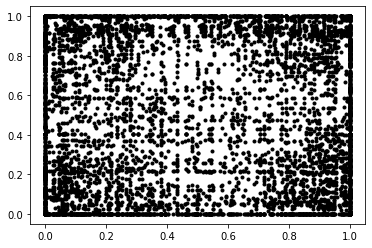

In [212]:
plt.figsize = (20,20)
for x, y in data.x[:, 3:5].cpu().numpy():
    plt.plot(x, y, marker='.', color='black')

plt.show()

In [213]:
import pickle
graph_dict = pickle.load(open(data.filepath.replace('.svg', '.pkl'), 'rb'))

In [214]:
graph_dict.keys()

dict_keys(['pos', 'attr', 'edge', 'edge_attr', 'img_width', 'img_height', 'cc'])

In [215]:
graph_dict['pos']['spatial'][graph_dict['cc'][0]]

array([[0.04450284, 0.37342052],
       [0.04450284, 0.37878809],
       [0.02352955, 0.37342052],
       [0.04450284, 0.47831182],
       [0.05165283, 0.37878809],
       [0.02352955, 0.48345575],
       [0.04450284, 0.48345575],
       [0.05165283, 0.47831182]])

In [216]:
graph_dict['pos']['spatial'], graph_dict['pos']['spatial'].shape

(array([[0.04450284, 0.37342052],
        [0.04450284, 0.37342052],
        [0.04450284, 0.37878809],
        ...,
        [0.41339037, 0.24954336],
        [0.41339037, 0.24666415],
        [0.41587767, 0.24433009]]),
 (753, 2))

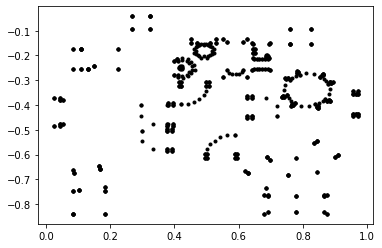

In [217]:
plt.figsize = (20,20)
for x, y in graph_dict['pos']['spatial']:
    plt.plot(x, -y, marker='.', color='black')

plt.show()

In [218]:
data.pos

tensor([[1.0000, 0.0000],
        [1.0000, 0.0488],
        [1.0000, 0.9533],
        ...,
        [0.0000, 1.0000],
        [1.0000, 0.8308],
        [0.8145, 0.0000]])

## _get_proposal

In [269]:
import pickle
from utils.det_util import bbox_iou_ios_cpu, intersect_bb_idx

class idxTree:
    def __init__(self):
        self.children = []
        self.value = {}

idx = 0
dataset = test_dataset
graph_dict = pickle.load(open(dataset.svg_list[idx].replace('.svg', '.pkl'), 'rb'))
bbox_sampling_step = dataset.bbox_sampling_step

filepath = dataset.svg_list[idx]
width, height = graph_dict['img_width'], graph_dict['img_height']

gt_bbox, gt_labels = dataset._get_bbox(filepath, width, height)

In [270]:
#def _get_proposal(self, graph_dict, gt_bbox, gt_labels, bbox_sampling_step = -1):
cc = graph_dict['cc']
pos = graph_dict['pos']['spatial']
edge = graph_dict['edge']['shape']
edge_super = graph_dict['edge']['super']
e_attr = graph_dict['edge_attr']['shape']
e_attr_super = graph_dict['edge_attr']['super']
is_super = graph_dict['attr']['is_super']
is_control = graph_dict['attr']['is_control']
width = graph_dict['img_width']
height = graph_dict['img_height']

In [271]:
#print(pos.shape, is_super.shape, edge.shape, edge_super.shape, e_attr.shape, e_attr_super.shape)
#dataset.mixup
        
o2n = {}
count = 0
for i, ic in enumerate(is_control):
    if not ic:
        o2n[i] = count
        count += 1

new_edge = []
for e in edge:
    new_edge.append([o2n[e[0]], o2n[e[1]]])
edge = np.array(new_edge)

new_cc = []
for cluster in cc:
    new_cluster = []
    for idx in cluster:
        new_cluster.append(o2n[idx])
    new_cc.append(new_cluster)
cc = new_cc

new_edge = []
for e in edge_super:
    new_edge.append([o2n[e[0]], o2n[e[1]]])
edge_super = np.array(new_edge)

not_control = (is_control == 0)[:, 0]
pos = pos[not_control]
is_super = is_super[not_control]

In [272]:
#print('before mixup', len(cc), pos.shape, edge_super.shape, e_attr_super.shape)
if dataset.do_mixup:
    cc, pos, edge, edge_super, e_attr, e_attr_super, is_super = dataset.mixup(cc, pos, edge, edge_super, e_attr, e_attr_super, is_super)
#print('after mixup', len(cc), pos.shape, edge_super.shape, e_attr_super.shape)

In [273]:
new_pos = []
new_edge = []
new_edge_super = []
new_e_attr = []
new_e_attr_super = []
new_is_super = []
new_labels = []
new_bbox = []
bbox_targets = []
bbox_idx = []
stat_feats = []
has_objs = []
offset = 0
roots = []
bbox_count = 0

subcluster_slice_pos = [0]
subcluster_slice_edge = [0]
subcluster_slice_super = [0]
subcluster_slice_bbox = [0]

In [247]:
#for cc_idx, cluster in enumerate(cc):
cc_idx, cluster = 0, cc[0]
#cluster = [i for i in cluster if not is_super[i]]
pos_cluster = pos[cluster, :]
#print(pos_cluster)

max_x = pos_cluster[:, 0].max(0)
min_x = pos_cluster[:, 0].min(0)
max_y = pos_cluster[:, 1].max(0)
min_y = pos_cluster[:, 1].min(0)

#########################
x_values = sorted(pos_cluster[:, 0])
y_values = sorted(pos_cluster[:, 1])
#print('fooo', x_values, y_values)
def merge_values(values):
    new_values  = [values[0]]
    for i in range(1, len(values)):
        if values[i] != values[i - 1]: #> 1e-3:
            new_values.append(values[i])
    return new_values
x_values = merge_values(x_values)
y_values = merge_values(y_values)
#print(x_values, y_values)

def get_values_dict(values):
    values_dict = {}
    for i, v in enumerate(values):
        values_dict[v] = i
    return values_dict
x_values_dict = get_values_dict(x_values)
y_values_dict = get_values_dict(y_values)

In [248]:
pos_cluster, x_values, y_values

(array([[0.04450284, 0.37342052],
        [0.04450284, 0.37878809],
        [0.02352955, 0.37342052],
        [0.04450284, 0.47831182],
        [0.05165283, 0.37878809],
        [0.02352955, 0.48345575],
        [0.04450284, 0.48345575],
        [0.05165283, 0.47831182]]),
 [0.023529552256572463, 0.0445028432472877, 0.05165283006836038],
 [0.3734205167791661,
  0.3787880886271882,
  0.4783118248041234,
  0.483455748639635])

In [249]:
x_values_dict

{0.023529552256572463: 0, 0.0445028432472877: 1, 0.05165283006836038: 2}

In [250]:
use_bit = False

#point_exist = np.ones((len(y_values), len(x_values))).astype(np.int8) * (-1)
point_exist = [[[] for j in range(len(x_values))] for i in range(len(y_values))]
#print(x_values, y_values)

pos_idx = range(pos_cluster.shape[0])
if use_bit and len(pos_idx) > 64:
    print('more than 64 points in cc', len(pos_idx))
    pos_idx = random.sample(pos_idx, 64)

for i in pos_idx:
    p = pos_cluster[i]                
    point_exist[y_values_dict[p[1]]][x_values_dict[p[0]]].append(i)


In [251]:
p[0], x_values_dict[p[0]]

(0.05165283006836038, 2)

In [252]:
point_exist

[[[2], [0], []], [[], [1], [4]], [[], [3], [7]], [[5], [6], []]]

In [253]:
def set_bit(value, bit):
    return value | (1<<bit)

d00 = [[None for i in range(len(x_values))] for j in range(len(y_values))]
d00[0][0] = point_exist[0][0]

for i in range(1, len(x_values)):
    d00[0][i] = d00[0][i - 1] + point_exist[0][i]

for i in range(1, len(y_values)):
    d00[i][0] = d00[i - 1][0] + point_exist[i][0]

d_row = [[None for i in range(len(x_values))] for j in range(len(y_values))]
for i in range(0, len(x_values)):
    d_row[0][i] = d00[0][i]

for i in range(1, len(y_values)):
    d_row[i][0] = point_exist[i][0]

for y in range(1, len(y_values)):
    for x in range(1, len(x_values)):
        d_row[y][x] = d_row[y][x - 1] + point_exist[y][x]
        d00[y][x] = d00[y - 1][x] + d_row[y][x]

for y in range(0, len(y_values)):
    for x in range(0, len(x_values)):
        d00[y][x] = set(d00[y][x])

In [254]:
d00

[[{2}, {0, 2}, {0, 2}],
 [{2}, {0, 1, 2}, {0, 1, 2, 4}],
 [{2}, {0, 1, 2, 3}, {0, 1, 2, 3, 4, 7}],
 [{2, 5}, {0, 1, 2, 3, 5, 6}, {0, 1, 2, 3, 4, 5, 6, 7}]]

In [255]:
sub_clusters = []
#print(len(y_values),len(x_values))


x_step = (max_x - min_x) / bbox_sampling_step #10 #5 #5#25
y_step = (max_y - min_y) / bbox_sampling_step #10 #5 #5
#print('x_step', x_step, 'y_step', y_step)
#print(d00)

x_grids = np.arange(min_x, max_x, x_step)
y_grids = np.arange(min_y, max_y, y_step)


x_grids = np.append(x_grids, max_x)
y_grids = np.append(y_grids, max_y)

In [256]:
bbox_sampling_step, x_grids, y_grids

(10,
 array([0.02352955, 0.02634188, 0.02915421, 0.03196654, 0.03477886,
        0.03759119, 0.04040352, 0.04321585, 0.04602817, 0.0488405 ,
        0.05165283]),
 array([0.37342052, 0.38442404, 0.39542756, 0.40643109, 0.41743461,
        0.42843813, 0.43944166, 0.45044518, 0.4614487 , 0.47245223,
        0.48345575]))

In [257]:
#print(x_grids, y_grids)
def move_endpoint(x, values, bound):
    if x >= len(values):
        return x - 1

    while values[x] <= bound:
        x += 1
        if x >= len(values):
            break
    return x - 1

def move_endpoint_close(x, values, bound):
    if x >= len(values):
        return x - 1

    while values[x] < bound:
        x += 1
        if x >= len(values):
            break
    return x - 1

prev_y0 = -1
grid_y0 = 0
for i_grid_y0, grid_y0 in enumerate(y_grids):
    y0 = move_endpoint_close(prev_y0 + 1, y_values, grid_y0)
    if y0 != len(y_values): y0 += 1
    if y0 == prev_y0: continue
    prev_y0 = y0
    
    grid_x0 = x_values[0]
    prev_x0 = -1
    for i_grid_x0, grid_x0 in enumerate(x_grids):
        x0 = move_endpoint_close(prev_x0 + 1, x_values, grid_x0)
        if x0 != len(y_values): x0 += 1
        if x0 == prev_x0: continue
        prev_x0 = x0
        
        #grid_y1 = grid_y0
        prev_y1 = y0
        for grid_y1 in y_grids[i_grid_y0 + 1 :]:
            y1 = move_endpoint(prev_y1 + 1, y_values, grid_y1)
            #if prev_y1 + 1 < len(y_values):
            #    print(prev_y1 + 1, y_values[prev_y1 + 1], 'to', grid_y1)
            if y1 == prev_y1: continue
            #print('---------------', prev_y1, 'to', y1, y_values[prev_y1], 'to', grid_y1)
            prev_y1 = y1
            
            #grid_x1 = grid_x0
            prev_x1 = x0
            for grid_x1 in x_grids[i_grid_x0 + 1:]:
                x1 = move_endpoint(prev_x1 + 1, x_values, grid_x1)
                if x1 == prev_x1: continue
                prev_x1 = x1
                
                if use_bit:
                    if x0 > 0 and y0 > 0:
                        dd = d00[y1][x1] - (d00[y1][x0 - 1] | d00[y0 - 1][x1])
                    elif x0 > 0 and y0 == 0:
                        dd = d00[y1][x1] - d00[y1][x0 - 1]
                    elif y0 > 0 and x0 == 0:
                        dd = d00[y1][x1] - d00[y0 - 1][x1]
                    else:
                        dd = d00[y1][x1]
                    if dd == 0: continue
                    count = 0
                    sub_c = []
                    while dd != 0:
                        if dd & 1:
                            sub_c.append(count)
                        count += 1
                        dd = dd >> 1
                    sub_c = [cluster[ii] for ii in sub_c]
                    sub_clusters.append(tuple(sub_c))
                else:
                    if x0 > 0 and y0 > 0:
                        dd = d00[y1][x1].difference(d00[y1][x0 - 1]).difference(d00[y0 - 1][x1])
                    elif x0 > 0 and y0 == 0:
                        dd = d00[y1][x1].difference(d00[y1][x0 - 1])
                    elif y0 > 0 and x0 == 0:
                        dd = d00[y1][x1].difference(d00[y0 - 1][x1])
                    else:
                        dd = d00[y1][x1]
                    #print(x0, y0, x1, y1, 'fooo')
                    sub_c = [cluster[ii] for ii in dd]
                    sub_clusters.append(tuple(sorted(sub_c)))

sub_clusters = list(set(sub_clusters))

In [258]:
sub_clusters

[(0, 1, 2, 3, 4, 5),
 (0, 1, 4),
 (0, 1, 7),
 (2, 3, 6),
 (0, 1, 4, 7),
 (2, 3, 5),
 (0, 1, 2, 3, 6, 7),
 (2, 3, 5, 6),
 (0, 1, 2, 3, 4, 5, 6, 7)]

In [259]:
#########################
def get_adj(edge):
    #adj = -np.ones((pos.shape[0], pos.shape[0])).astype(np.int)
    adj = [[[] for j in range(pos.shape[0])] for j in range(pos.shape[0])]
    for i, e in enumerate(edge):
        #adj[e[0], e[1]] = i
        #adj[e[1], e[0]] = i
        adj[e[0]][e[1]].append(i)
        adj[e[1]][e[0]].append(i)
    return adj

A = get_adj(edge)
A_super = get_adj(edge_super)
#print(A)

bbox_cc = np.array([min_x, min_y, max_x, max_y])[None, :]
gt_bbox_idx_valid = intersect_bb_idx(bbox_cc, gt_bbox)
if gt_bbox_idx_valid.shape[0] == 0:
    print('cc has no intersect gt bbox')
    raise SystemExit

sub_bbox_n = 0

In [260]:
A

[[[],
  [226],
  [],
  [],
  [230],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []

In [261]:
sub_clusters

[(0, 1, 2, 3, 4, 5),
 (0, 1, 4),
 (0, 1, 7),
 (2, 3, 6),
 (0, 1, 4, 7),
 (2, 3, 5),
 (0, 1, 2, 3, 6, 7),
 (2, 3, 5, 6),
 (0, 1, 2, 3, 4, 5, 6, 7)]

In [262]:
graph_dict['pos']['spatial'], graph_dict['pos']['spatial'][sub_clusters[0], :]

(array([[0.04450284, 0.37342052],
        [0.04450284, 0.37342052],
        [0.04450284, 0.37878809],
        ...,
        [0.41339037, 0.24954336],
        [0.41339037, 0.24666415],
        [0.41587767, 0.24433009]]),
 array([[0.04450284, 0.37342052],
        [0.04450284, 0.37342052],
        [0.04450284, 0.37878809],
        [0.04450284, 0.37878809],
        [0.04450284, 0.37878809],
        [0.04450284, 0.47831182]]))

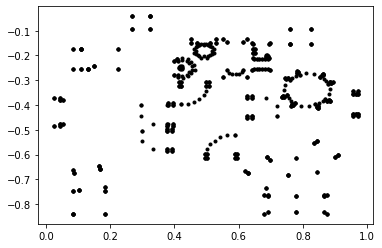

In [263]:
for x, y in graph_dict['pos']['spatial']:
    plt.plot(x, -y, marker='.', color='black')

plt.show()

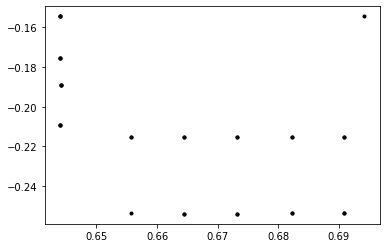

In [264]:
for x, y in graph_dict['pos']['spatial'][sorted(cc, key=lambda x: len(x))[-1]]:
    plt.plot(x, -y, marker='.', color='black')

plt.show()

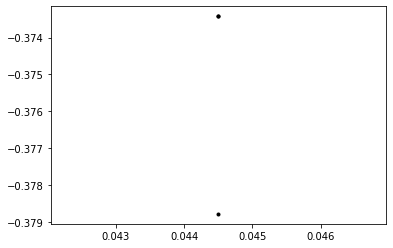

In [265]:
for x, y in graph_dict['pos']['spatial'][sub_clusters[1], :]:
    plt.plot(x, -y, marker='.', color='black')

plt.show()

In [120]:
for idxs in sub_clusters:
    o2n = {}
    for i, idx in enumerate(idxs):
        o2n[idx] = i
    pos_bbox = pos[idxs, :]
    is_super_bbox = is_super[idxs, :]
    #idxs = set(idxs)
    
    edge_idxs = []
    for i in range(len(idxs)):
        for j in range(i + 1, len(idxs)):
            #if A[idxs[i], idxs[j]] >= 0:
                #edge_idxs.append(A[idxs[i], idxs[j]])
            edge_idxs+= A[idxs[i]][idxs[j]]

    edge_bbox = edge[edge_idxs]
    if edge_bbox.shape[0] == 0:
        continue
    #print(edge_bbox)
    edge_bbox = np.array([[o2n[e[0]] + offset, o2n[e[1]] + offset] for e in edge_bbox])
    e_attr_bbox = e_attr[edge_idxs]
    
    edge_idxs = []
    for i in range(len(idxs)):
        for j in range(i + 1, len(idxs)):
            #if A_super[idxs[i], idxs[j]] >= 0:
                #edge_idxs.append(A_super[idxs[i], idxs[j]])
            edge_idxs += A_super[idxs[i]][idxs[j]]
    
    edge_super_bbox = edge_super[edge_idxs]
    edge_super_bbox = np.array([[o2n[e[0]] + offset, o2n[e[1]] + offset] for e in edge_super_bbox])
    e_attr_super_bbox = e_attr_super[edge_idxs]
    
    #print(count, offset, pos_bbox.shape, is_super_bbox.shape, edge_bbox.shape, edge_super_bbox.shape, e_attr_bbox.shape, e_attr_super_bbox.shape)

    max_x = pos_bbox[:, 0].max(0)
    min_x = pos_bbox[:, 0].min(0)
    max_y = pos_bbox[:, 1].max(0)
    min_y = pos_bbox[:, 1].min(0)
                    
    if max_x - min_x < 1e-4 or max_y - min_y < 1e-4:
        continue
        
    proposal = np.array([min_x, min_y, max_x, max_y])[None, :]
    iou, ios = bbox_iou_ios_cpu(proposal, gt_bbox[gt_bbox_idx_valid, :])
    idx_gt = np.argmax(iou)
    
    
    if iou[idx_gt] > 0.7:
        label = gt_labels[gt_bbox_idx_valid[idx_gt]]                    
        bbox_target = gt_bbox[gt_bbox_idx_valid[idx_gt]][None, :]

    else:
        label = dataset.n_classes - 1
        bbox_target = np.zeros((1, 4))

    idx_gt = np.argmax(iou)
    if ios[idx_gt] > 0.7:
        has_obj = 1
    else:
        has_obj = 0
    
    
    ######################obtain stats#################################
    stats = []
    n_points = pos_bbox.shape[0]
    n_edges = edge_bbox.shape[0]
    
    n_angle_less90 = 0
    n_angle_90 = 0
    n_angle_more90 = 0
    adj = [set() for i in range(pos.shape[0])]

    for e in edge_bbox:
        adj[e[0] - offset].add(e[1] - offset)
        adj[e[1] - offset].add(e[0] - offset)
        
    angles = []
    for anchor, neighbors in enumerate(adj):
        neighbors = list(neighbors)
        for i in range(len(neighbors)):
            for j in range(i + 1, len(neighbors)):
                p0 = pos_bbox[neighbors[i]]
                p1 = pos_bbox[neighbors[j]]
                p_anchor = pos_bbox[anchor]
                v0 = p0 - p_anchor
                v1 = p1 - p_anchor

                dot = v0[0] * v1[0] + v0[1] * v1[1]
                if dot <= -1e-2:
                    n_angle_more90 += 1
                elif dot >= 1e-2:
                    n_angle_less90 += 1
                elif np.abs(dot) < 1e-2:
                    n_angle_90 +=1
                angles.append(dot)
                
    width = max_x - min_x
    height = max_y - min_y

    if len(angles) == 0:
        continue
    
    angles = np.array(angles)
    mean_angle = np.mean(angles)
    max_angle = np.max(angles)
    min_angle = np.min(angles)
    std_angle = np.std(angles)

    long_short_ratio = max(width, height) * 1.0 / min(width, height)

    mean_edge_distance = np.mean(e_attr_bbox[:, -1])
    std_edge_distance = np.std(e_attr_bbox[:, -1])
    mean_edge_angle = np.mean(e_attr_bbox[:, -2])
    std_edge_angle = np.std(e_attr_bbox[:, -2])

    '''
    stat_feat = np.array([n_points, n_edges, n_angle_90, n_angle_less90, n_angle_more90, 
        width, height, mean_angle, max_angle, min_angle, std_angle, mean_edge_angle, 
        std_edge_angle, mean_edge_distance, std_edge_distance])[None, :]
        #, long_short_ratio])[None, :]
    '''
    
    stat_feat = np.array([n_points, n_edges, n_angle_90, n_angle_less90, n_angle_more90, 
        width, height, mean_angle, max_angle, min_angle, std_angle, mean_edge_distance, std_edge_distance])[None, :]

    if dataset.normalize_bbox:
        '''
        if max_x - min_x >  max_y - min_y:
            pos_bbox = (pos_bbox - [min_x, min_y]) / [max_x - min_x, max_x - min_x]
        else:
            pos_bbox = (pos_bbox - [min_x, min_y]) / [max_y - min_y, max_y - min_y]
        '''
        pos_bbox = (pos_bbox - [min_x, min_y]) / [max_x - min_x, max_y - min_y]
    

    subcluster_slice_pos.append(subcluster_slice_pos[-1] + pos_bbox.shape[0])
    subcluster_slice_edge.append(subcluster_slice_edge[-1] + edge_bbox.shape[0])
    subcluster_slice_super.append(subcluster_slice_super[-1] + edge_super_bbox.shape[0])
    subcluster_slice_bbox.append(subcluster_slice_bbox[-1] + 1)

    new_pos.append(pos_bbox)
    new_is_super.append(is_super_bbox)
    if edge_bbox.shape[0] > 0:
        new_edge.append(edge_bbox)
    if edge_super_bbox.shape[0] > 0:
        new_edge_super.append(edge_super_bbox)
    new_e_attr.append(e_attr_bbox)
    new_e_attr_super.append(e_attr_super_bbox)
    new_labels.append(label)
    has_objs.append(has_obj)
    bbox_idx += [bbox_count] * pos_bbox.shape[0]
    offset += pos_bbox.shape[0]
    new_bbox.append([min_x, min_y, max_x, max_y])
    bbox_targets.append(bbox_target)
    stat_feats.append(stat_feat)

    sub_bbox_n += 1
    bbox_count += 1

In [121]:
#print(sub_bbox_n, subcluster_slice_pos, subcluster_slice_edge, subcluster_slice_super, subcluster_slice_bbox)

idx_offset = len(subcluster_slice_bbox) - sub_bbox_n - 1
sub_bbox = np.array(new_bbox)[subcluster_slice_bbox[idx_offset]:]
#print(sub_bbox, sub_bbox.shape)
area = (sub_bbox[:, 2] - sub_bbox[:, 0]) * (sub_bbox[:, 3] - sub_bbox[:, 1])
#print(area)
max_idx = np.argmax(area)
#print('root idx', max_idx)
root = idxTree()
root.value['idx_pos'] = (subcluster_slice_pos[idx_offset + max_idx], subcluster_slice_pos[idx_offset + max_idx + 1])
root.value['idx_edge'] = (subcluster_slice_edge[idx_offset + max_idx], subcluster_slice_edge[idx_offset + max_idx + 1])
root.value['idx_edge_super'] = (subcluster_slice_super[idx_offset + max_idx], subcluster_slice_super[idx_offset + max_idx + 1])
root.value['idx_bbox'] = subcluster_slice_bbox[idx_offset + max_idx]

#print(root.value)

#print(subcluster_slice_pos, len(bbox_idx))
for i in range(sub_bbox.shape[0]):
    if i == max_idx: continue
    p = idxTree()
    p.value['idx_pos'] = (subcluster_slice_pos[idx_offset + i], subcluster_slice_pos[idx_offset + i + 1])
    p.value['idx_edge'] = (subcluster_slice_edge[idx_offset + i], subcluster_slice_edge[idx_offset + i + 1])
    p.value['idx_edge_super'] = (subcluster_slice_super[idx_offset + i], subcluster_slice_super[idx_offset + i + 1])
    p.value['idx_bbox'] = subcluster_slice_bbox[idx_offset + i]
    root.children.append(p)
#print(subcluster_slice_pos, subcluster_slice_edge, subcluster_slice_super, subcluster_slice_bbox)
roots.append(root)

#print(len(bbox_idx), np.concatenate(new_pos, axis = 0).shape)
#raise SystemExit

In [122]:
pos = np.concatenate(new_pos, axis = 0)
is_super = np.concatenate(new_is_super, axis = 0)
edge = np.concatenate(new_edge, axis = 0)
edge_super = np.concatenate(new_edge_super, axis = 0)
e_attr = np.concatenate(new_e_attr, axis = 0)
e_attr_super = np.concatenate(new_e_attr_super, axis = 0)
labels = new_labels
new_bbox = np.array(new_bbox)
bbox_targets = np.concatenate(bbox_targets, axis = 0)
bbox_idx = np.array(bbox_idx)
is_control = np.zeros((pos.shape[0], 1))
stat_feats = np.concatenate(stat_feats, axis = 0)
has_obj = has_objs
#print(pos.shape, is_super.shape, edge.shape, edge_super.shape, e_attr.shape, e_attr_super.shape)
#print(pos.shape)

#return pos, is_super, is_control, edge, edge_super, e_attr, e_attr_super, labels, bbox_idx, new_bbox, bbox_targets, stat_feats, has_obj, roots

In [279]:
test_dataset[0].bbox_idx

tensor([  0,   0,   0,  ..., 848, 848, 848])

In [123]:
pos_bbox, new_pos

(array([[0.74576268, 0.        ],
        [0.74576268, 0.04878048],
        [0.74576268, 0.95325203],
        [0.74576268, 1.        ],
        [0.        , 0.        ],
        [0.        , 1.        ],
        [1.        , 0.95325203],
        [1.        , 0.04878048]]),
 [array([[1.        , 0.        ],
         [1.        , 0.04878048],
         [1.        , 0.95325203],
         [1.        , 1.        ],
         [0.        , 0.        ],
         [0.        , 1.        ]]),
  array([[1., 0.],
         [1., 1.],
         [0., 0.]]),
  array([[0., 0.],
         [0., 1.],
         [1., 1.]]),
  array([[0., 0.],
         [0., 1.],
         [1., 0.]]),
  array([[0.74576268, 0.        ],
         [0.74576268, 1.        ],
         [0.        , 0.        ],
         [1.        , 1.        ]]),
  array([[1., 0.],
         [1., 1.],
         [0., 1.]]),
  array([[0.        , 0.        ],
         [0.        , 0.04878048],
         [0.        , 0.95325203],
         [0.        , 1.       

In [124]:
pos

array([[1.        , 0.        ],
       [1.        , 0.04878048],
       [1.        , 0.95325203],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 1.        ],
       [0.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.74576268, 0.        ],
       [0.74576268, 1.        ],
       [0.        , 0.        ],
       [1.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 0.        ],
       [0.        , 0.04878048],
       [0.        , 0.95325203],
       [0.        , 1.        ],
       [1.        , 0.95325203],
       [1.        , 0.04878048],
       [0.74576268, 0.        ],
       [0.74576268, 1.        ],
       [0.

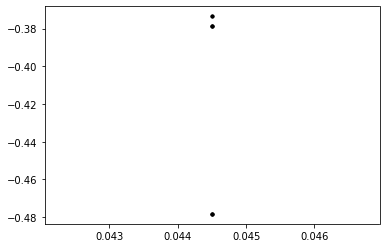

In [142]:
for x, y in graph_dict['pos']['spatial'][cluster]:
    plt.plot(x, -y, marker='.', color='black')

plt.show()

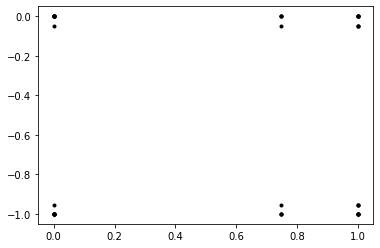

In [126]:
for x, y in np.concatenate(new_pos, axis=0):
    plt.plot(x, -y, marker='.', color='black')

plt.show()

In [102]:
edge

array([[295, 302],
       [197, 199],
       [116, 118],
       [117, 118],
       [148, 149],
       [  5, 304],
       [157, 162],
       [174, 175],
       [188, 189],
       [ 11,  15],
       [208, 209],
       [ 75,  76],
       [  1,   2],
       [195, 196],
       [249, 250],
       [221, 225],
       [316, 319],
       [179, 182],
       [  0,   3],
       [234, 235],
       [153, 155],
       [237, 241],
       [244, 245],
       [232, 236],
       [290, 291],
       [ 68,  69],
       [ 61,  62],
       [239, 240],
       [320, 321],
       [157, 158],
       [ 53,  54],
       [ 77,  78],
       [278, 279],
       [ 71,  72],
       [150, 154],
       [298, 299],
       [276, 290],
       [322, 323],
       [196, 198],
       [101, 102],
       [184, 185],
       [ 80,  81],
       [131, 132],
       [282, 283],
       [213, 214],
       [168, 169],
       [143, 146],
       [137, 138],
       [265, 266],
       [137, 142],
       [122, 123],
       [158, 165],
       [309,

In [104]:
np.concatenate(new_edge, axis=0)

array([[  0,   1],
       [  0,   3],
       [  1,   2],
       [  2,   3],
       [  5,   6],
       [  5,   8],
       [  6,   7],
       [  7,   8],
       [  9,  10],
       [  9,  12],
       [ 10,  11],
       [ 11,  12],
       [ 13,  14],
       [ 13,  15],
       [ 13,  17],
       [ 15,  16],
       [ 16,  17],
       [ 18,  19],
       [ 18,  21],
       [ 19,  20],
       [ 20,  21],
       [ 20,  26],
       [ 22,  23],
       [ 22,  25],
       [ 23,  24],
       [ 24,  25],
       [ 27,  28],
       [ 27,  31],
       [ 29,  30],
       [ 32,  33],
       [ 32,  35],
       [ 33,  34],
       [ 34,  35],
       [ 36,  37],
       [ 37,  38],
       [ 39,  40],
       [ 41,  42],
       [ 41,  44],
       [ 42,  43],
       [ 43,  44],
       [ 45,  46],
       [ 46,  47],
       [ 48,  49],
       [ 48,  50],
       [ 51,  52],
       [ 51,  54],
       [ 52,  53],
       [ 53,  54],
       [ 53,  60],
       [ 55,  56],
       [ 55,  57],
       [ 55,  59],
       [ 56,

In [133]:
data.filepath

'data/FloorPlansGraph5_iter\\floorplans16-10/file_36.svg'

In [138]:
npos, *_ = pickle.load(open(data.filepath.replace('.svg', '_bb.pkl'), 'rb'))

In [139]:
pos, npos

(array([[1.        , 0.        ],
        [1.        , 0.04878048],
        [1.        , 0.95325203],
        [1.        , 1.        ],
        [0.        , 0.        ],
        [0.        , 1.        ],
        [1.        , 0.        ],
        [1.        , 1.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 1.        ],
        [1.        , 1.        ],
        [0.        , 0.        ],
        [0.        , 1.        ],
        [1.        , 0.        ],
        [0.74576268, 0.        ],
        [0.74576268, 1.        ],
        [0.        , 0.        ],
        [1.        , 1.        ],
        [1.        , 0.        ],
        [1.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 0.        ],
        [0.        , 0.04878048],
        [0.        , 0.95325203],
        [0.        , 1.        ],
        [1.        , 0.95325203],
        [1.        , 0.04878048],
        [0.74576268, 0.        ],
        [0.745

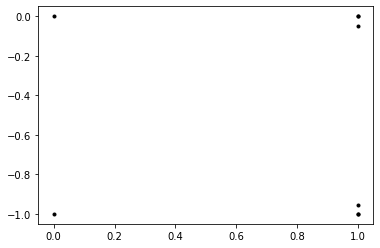

In [141]:
for x, y in npos[cluster]:
    plt.plot(x, -y, marker='.', color='black')

plt.show()

In [144]:
bbox_idx

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8])

## test.pyを動かしてみる

In [1]:
%run cad_recognition/train.py --total_epochs 20 --batch_size 4 --data_dir data/FloorPlansGraph5_iter --phase train --lr 2.5e-4 --lr_adjust_freq 9999999999999999999999999999999999999 --in_channels 5 --n_blocks 2 --n_blocks_out 2 --arch centernet3cc_rpn_gp_iter2  --graph bezier_cc_bb_iter --data_aug false --weight_decay 1e-5 --postname run182_2 --dropout 0.0 --do_mixup 0 --bbox_sampling_step 10 --pretrained_model log/sem_seg_sparse-res-attr_edge-n2-C64-k16-drop0.0-lr0.00025_B4_20220802-115745_45ea7aa5-fa20-4360-8326-1e9149865d19/checkpoint/run182_2_best.pth

c:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2022-08-03 09:53:51,691 saving log, checkpoint and back up code
2022-08-03 09:53:51,692 ==========       args      =============
2022-08-03 09:53:51,693 phase:train
2022-08-03 09:53:51,693 use_cpu:False
2022-08-03 09:53:51,694 exp_name:sem_seg_sparse
2022-08-03 09:53:51,695 root_dir:log
2022-08-03 09:53:51,695 data_dir:data/FloorPlansGraph5_iter
2022-08-03 09:53:51,696 batch_size:4
2022-08-03 09:53:51,697 in_channels:5
2022-08-03 09:53:51,697 total_epochs:20
2022-08-03 09:53:51,697 save_freq:5
2022-08-03 09:53:51,698 iter:0
2022-08-03 09:53:51,698 lr_adjust_freq:9999999999999999999999999999999999999
2022-08-03 09:53:51,699 lr:0.00025
2022-08-03 09:53:51,699 lr_decay_rate:0.5
2022-08-03 09:53:51,700 print_freq:5
2022-08-03 09:53:51,700 postname:run182_2
2022-08-03 09:53:51,701 multi_gpus:False
2022-08-03 09:53:51,701 seed:0
2022-08-03 09:53:51,702 pos_edge_th:0.005
2022-08-03 09:53:51,702 lambda_class:1
2022-08-03 09:53:51,703 lambda_offset:1
2022-08-03 09:53:51,703 lambda_size:10
2022-

In [1]:
%run cad_recognition/test.py \
    --total_epochs 20 \
    --batch_size 4 \
    --data_dir data/FloorPlansGraph5_iter \
    --phase train \
    --lr 2.5e-4 \
    --lr_adjust_freq 9999999999999999999999999999999999999 \
    --in_channels 5 \
    --n_blocks 2 \
    --n_blocks_out 2 \
    --arch centernet3cc_rpn_gp_iter2  \
    --graph bezier_cc_bb_iter \
    --data_aug false \
    --weight_decay 1e-5 \
    --postname run182_2 \
    --dropout 0.0 \
    --do_mixup 0 \
    --bbox_sampling_step 10 \
    --pretrained_model log/sem_seg_sparse-res-attr_edge-n2-C64-k16-drop0.0-lr0.00025_B4_20220802-115745_45ea7aa5-fa20-4360-8326-1e9149865d19/checkpoint/run182_2_best.pth

c:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2022-08-03 21:24:40,299 saving log, checkpoint and back up code
2022-08-03 21:24:40,300 ==========       args      =============
2022-08-03 21:24:40,301 phase:train
2022-08-03 21:24:40,301 use_cpu:False
2022-08-03 21:24:40,301 exp_name:sem_seg_sparse
2022-08-03 21:24:40,302 root_dir:log
2022-08-03 21:24:40,302 data_dir:data/FloorPlansGraph5_iter
2022-08-03 21:24:40,302 batch_size:4
2022-08-03 21:24:40,303 in_channels:5
2022-08-03 21:24:40,303 total_epochs:20
2022-08-03 21:24:40,304 save_freq:5
2022-08-03 21:24:40,304 iter:0
2022-08-03 21:24:40,305 lr_adjust_freq:9999999999999999999999999999999999999
2022-08-03 21:24:40,307 lr:0.00025
2022-08-03 21:24:40,307 lr_decay_rate:0.5
2022-08-03 21:24:40,307 print_freq:5
2022-08-03 21:24:40,308 postname:run182_2
2022-08-03 21:24:40,309 multi_gpus:False
2022-08-03 21:24:40,309 seed:0
2022-08-03 21:24:40,309 pos_edge_th:0.005
2022-08-03 21:24:40,310 lambda_class:1
2022-08-03 21:24:40,310 lambda_offset:1
2022-08-03 21:24:40,311 lambda_size:10
2022-

RuntimeError: CUDA out of memory. Tried to allocate 234.00 MiB (GPU 0; 8.00 GiB total capacity; 315.55 MiB already allocated; 6.23 GiB free; 360.00 MiB reserved in total by PyTorch)

In [1]:
%run cad_recognition/detect.py \
    --total_epochs 20 \
    --batch_size 1 \
    --data_dir data/FloorPlansGraph5_iter \
    --phase test \
    --lr 2.5e-4 \
    --lr_adjust_freq 9999999999999999999999999999999999999 \
    --in_channels 5 \
    --n_blocks 2 \
    --n_blocks_out 2 \
    --arch centernet3cc_rpn_gp_iter2  \
    --graph bezier_cc_bb_iter \
    --data_aug false \
    --weight_decay 1e-5 \
    --postname run182_2 \
    --dropout 0.0 \
    --do_mixup 0 \
    --bbox_sampling_step 10 \
    --pretrained_model log/sem_seg_sparse-res-attr_edge-n2-C64-k16-drop0.0-lr0.00025_B4_20220802-115745_45ea7aa5-fa20-4360-8326-1e9149865d19/checkpoint/run182_2_best.pth

c:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2022-08-05 23:16:45,133 saving log, checkpoint and back up code
2022-08-05 23:16:45,133 ==========       args      =============
2022-08-05 23:16:45,134 phase:test
2022-08-05 23:16:45,135 use_cpu:True
2022-08-05 23:16:45,136 exp_name:sem_seg_sparse
2022-08-05 23:16:45,136 root_dir:log
2022-08-05 23:16:45,137 data_dir:data/FloorPlansGraph5_iter
2022-08-05 23:16:45,138 batch_size:1
2022-08-05 23:16:45,138 in_channels:5
2022-08-05 23:16:45,139 total_epochs:20
2022-08-05 23:16:45,139 save_freq:5
2022-08-05 23:16:45,140 iter:0
2022-08-05 23:16:45,141 lr_adjust_freq:9999999999999999999999999999999999999
2022-08-05 23:16:45,141 lr:0.00025
2022-08-05 23:16:45,142 lr_decay_rate:0.5
2022-08-05 23:16:45,142 print_freq:5
2022-08-05 23:16:45,143 postname:run182_2
2022-08-05 23:16:45,143 multi_gpus:False
2022-08-05 23:16:45,144 seed:0
2022-08-05 23:16:45,145 pos_edge_th:0.005
2022-08-05 23:16:45,145 lambda_class:1
2022-08-05 23:16:45,146 lambda_offset:1
2022-08-05 23:16:45,146 lambda_size:10
2022-08

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:73] data. DefaultCPUAllocator: not enough memory: you tried to allocate 177822720 bytes. Buy new RAM!

In [1]:
%run cad_recognition/draw_graph.py \
    --total_epochs 20 \
    --batch_size 4 \
    --data_dir data/FloorPlansGraph5_iter \
    --phase train \
    --lr 2.5e-4 \
    --lr_adjust_freq 9999999999999999999999999999999999999 \
    --in_channels 5 \
    --n_blocks 2 \
    --n_blocks_out 2 \
    --arch centernet3cc_rpn_gp_iter2  \
    --graph bezier_cc_bb_iter \
    --data_aug false \
    --weight_decay 1e-5 \
    --postname run182_2 \
    --dropout 0.0 \
    --do_mixup 0 \
    --bbox_sampling_step 10 \
    --pretrained_model log/sem_seg_sparse-res-attr_edge-n2-C64-k16-drop0.0-lr0.00025_B4_20220802-115745_45ea7aa5-fa20-4360-8326-1e9149865d19/checkpoint/run182_2_best.pth

c:\Users\ottos\akariinc\YOLaT-VectorGraphicsRecognition\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2022-08-03 22:12:06,358 saving log, checkpoint and back up code
2022-08-03 22:12:06,358 ==========       args      =============
2022-08-03 22:12:06,359 phase:train
2022-08-03 22:12:06,359 use_cpu:False
2022-08-03 22:12:06,360 exp_name:sem_seg_sparse
2022-08-03 22:12:06,361 root_dir:log
2022-08-03 22:12:06,361 data_dir:data/FloorPlansGraph5_iter
2022-08-03 22:12:06,362 batch_size:4
2022-08-03 22:12:06,363 in_channels:5
2022-08-03 22:12:06,363 total_epochs:20
2022-08-03 22:12:06,363 save_freq:5
2022-08-03 22:12:06,364 iter:0
2022-08-03 22:12:06,364 lr_adjust_freq:9999999999999999999999999999999999999
2022-08-03 22:12:06,365 lr:0.00025
2022-08-03 22:12:06,366 lr_decay_rate:0.5
2022-08-03 22:12:06,367 print_freq:5
2022-08-03 22:12:06,368 postname:run182_2
2022-08-03 22:12:06,368 multi_gpus:False
2022-08-03 22:12:06,369 seed:0
2022-08-03 22:12:06,369 pos_edge_th:0.005
2022-08-03 22:12:06,370 lambda_class:1
2022-08-03 22:12:06,370 lambda_offset:1
2022-08-03 22:12:06,371 lambda_size:10
2022-